In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

from fast_ml.eda import eda_summary
from fast_ml.eda import eda_numerical_variable, eda_numerical_plots, eda_numerical_plots_with_target 
from fast_ml.eda import eda_categorical_variable, eda_categorical_plots, eda_categorical_plots_with_target
from fast_ml.missing_data_analysis import MissingDataAnalysis
from fast_ml.utilities import display_all, reduce_memory_usage
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Load Data - Transaction file in CSV format

In [2]:
%time trans = pd.read_csv('train_transaction.csv')

df_size = trans.memory_usage().sum() / 1024**2
print(f'Memory usage of dataframe is {df_size} MB')

print (f'Shape of dataframe is {trans.shape}')

CPU times: user 23.2 s, sys: 7.87 s, total: 31 s
Wall time: 32.5 s
Memory usage of dataframe is 1775.1524047851562 MB
Shape of dataframe is (590540, 394)


#### We will use a function from fast_ml to reduce the memory usage

In [3]:
from fast_ml.utilities import reduce_memory_usage

%time trans = reduce_memory_usage(trans, convert_to_category=False)

Memory usage of dataframe is 1775.15 MB
Memory usage after optimization is: 542.35 MB
Decreased by 69.4%
CPU times: user 2min 25s, sys: 2min 57s, total: 5min 23s
Wall time: 5min 56s


#### Create a sample dataset of 200k records from the original dataset

In [4]:
# Take a sample of 200k records
%time trans = trans.sample(n=200000)

df_size = trans.memory_usage().sum() / 1024**2
print(f'Memory usage of sample dataframe is {df_size} MB')

CPU times: user 1.39 s, sys: 776 ms, total: 2.16 s
Wall time: 2.43 s
Memory usage of sample dataframe is 185.20355224609375 MB


#### Save the sample dataset in local drive - CSV format

In [5]:
import os

os.makedirs('tmp', exist_ok=True)
%time trans.to_csv('tmp/train_transaction_sample.csv', index = False)

CPU times: user 1min 9s, sys: 1.32 s, total: 1min 10s
Wall time: 1min 12s


#### Save the sample dataset in local drive - Feather format

In [9]:
# little bit index alignment is required because the data we selected is randomly pulled from origian dataset
trans.reset_index(inplace = True, drop = True)

In [10]:
import os 

os.makedirs('tmp', exist_ok=True)
%time trans.to_feather('tmp/train_transaction_sample')

CPU times: user 1.61 s, sys: 235 ms, total: 1.84 s
Wall time: 904 ms


##### Load the saved sample data - CSV Format
Note : dataframe size was 185 MB and observe the difference in size after we load it in from a csv format

In [12]:
%time tmp1 = pd.read_csv('tmp/train_transaction_sample.csv')

df_size = tmp1.memory_usage().sum() / 1024**2
print(f'Memory usage of dataframe is {df_size} MB')
print (f'Shape of dataframe is {tmp1.shape}')

CPU times: user 7.37 s, sys: 1.06 s, total: 8.42 s
Wall time: 8.5 s
Memory usage of dataframe is 601.1964111328125 MB
Shape of dataframe is (200000, 394)


##### Load the saved sample data - Feather Format
Note : dataframe size was 185 MB and observe the difference in size after we load it in from a feather format

In [2]:
%time trans = pd.read_feather('tmp/train_transaction_sample')

df_size = trans.memory_usage().sum() / 1024**2
print(f'Memory usage of dataframe is {df_size} MB')
print (f'Shape of dataframe is {trans.shape}')

CPU times: user 1.32 s, sys: 930 ms, total: 2.25 s
Wall time: 1.92 s
Memory usage of dataframe is 183.67779541015625 MB
Shape of dataframe is (200000, 394)


## EDA

### Summary of the Dataset

In [7]:
# Using fast_ml function to get a summary view. display_all is a function imported from fast_ml.utilities
summary_df = eda_summary(trans)
display_all(summary_df)

,data_type,num_unique_values,sample_unique_values,num_missing,perc_missing
TransactionID,int32,200000,"[3340057, 3369734, 3462322, 2988794, 3031584, ...",0,0
isFraud,int8,2,"[0, 1]",0,0
TransactionDT,int32,198049,"[8713400, 9583269, 12275348, 139136, 1079439, ...",0,0
TransactionAmt,float16,6494,"[774.0, 29.0, 105.3125, 2182.0, 97.9375, 24.5,...",0,0
ProductCD,object,5,"[W, C, S, H, R]",0,0
card1,int16,9836,"[11596, 11919, 8406, 12570, 16085, 10532, 5772...",0,0
card2,float16,500,"[188.0, 170.0, 264.0, 462.0, 297.0, 534.0, 298...",3009,1.5045
card3,float16,94,"[150.0, 106.0, 185.0, 147.0, 143.0, 144.0, 146...",536,0.268
card4,object,4,"[visa, mastercard, discover, american express,...",539,0.2695
card5,float16,101,"[226.0, 224.0, 166.0, 117.0, 126.0, 138.0, 195...",1428,0.714


#### C1-C14 except C3
* very long tail of values. 
* No missing value

#### C3
* Numerical type but looks like categorical

#### M1-M9
* Categorical variable with just 2 categories T & F
* high perc of missing
* M4 : is different it has M0, M1, M2
* <b>Missing value imputation : </b> 
* <b>Rare Encoding : </b>
* <b>Categorical Encoding : </b>

#### V1-V11
* Numeric type but looks like categorical
* Same number of missing values. possible that same rows have missing values
* high perc of missing ~48%. 
* <b>Missing value imputation : </b> use custom value imputation
* <b>Rare Encoding : </b>
* <b>Categorical Encoding : </b>


#### V12-V34
* Numeric type but looks like categorical
* Same number of missing values. possible that same rows have missing values
* high perc of missing ~13%. 
* Investigate whether frequent value imputation or custom value what would make more sense
* <b>Missing value imputation : </b> 
* <b>Rare Encoding : </b>
* <b>Categorical Encoding : </b>

#### V34-V52
* Numeric type but looks like categorical
* Same number of missing values. possible that same rows have missing values
* high perc of missing ~29%. 
* Investigate whether frequent value imputation or custom value what would make more sense
* <b>Missing value imputation : </b> 
* <b>Rare Encoding : </b>
* <b>Categorical Encoding : </b>


#### V53-V74

#### V75-V94

#### V95-V137

#### V138-V166


---
### Checking V variables
#### Numeric type but Categorical 
* V1 - V94 They all look to have low cardinality
* V107 - V125 They all look to have low cardinality

#### Numerical
* 95, 96, 97, 101, 102, 103, V126 - V137, 

#### Investigate further
* 99, 105, 106

### C1-C14 

1. Plot for C1


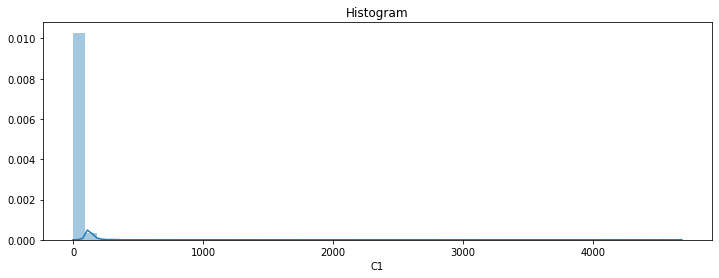

2. Plot for C2


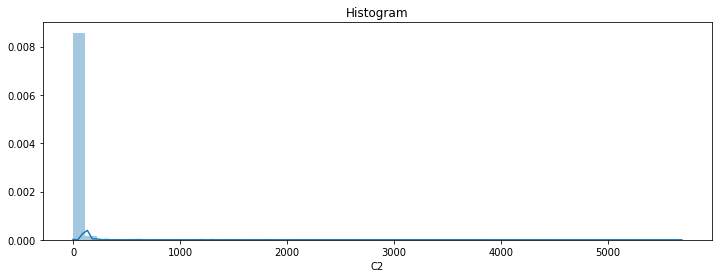

3. Plot for C3
Plots for variable : C3 can't be plotted
4. Plot for C4
Plots for variable : C4 can't be plotted
5. Plot for C5


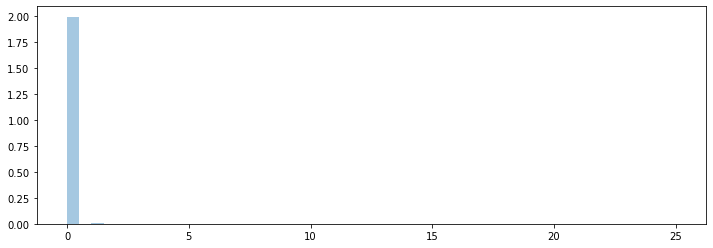

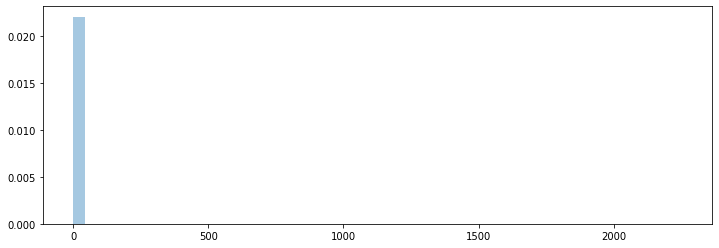

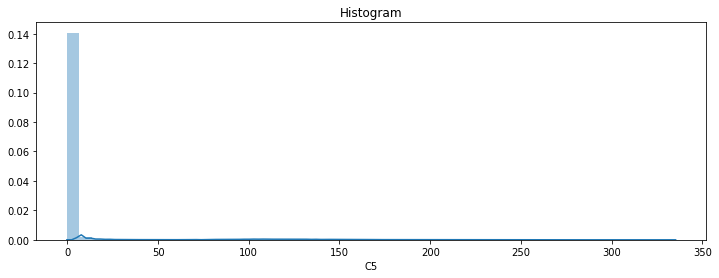

6. Plot for C6


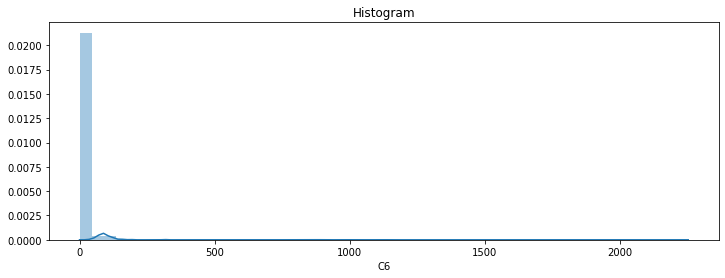

7. Plot for C7
Plots for variable : C7 can't be plotted
8. Plot for C8
Plots for variable : C8 can't be plotted
9. Plot for C9


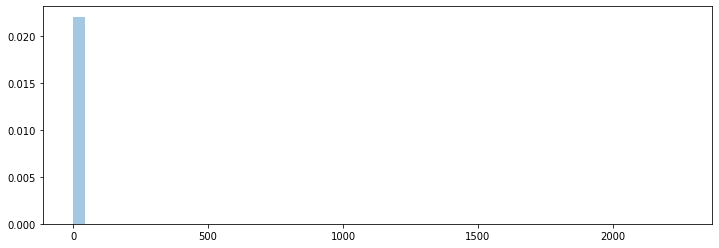

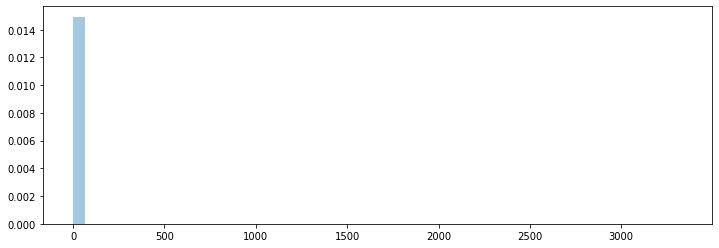

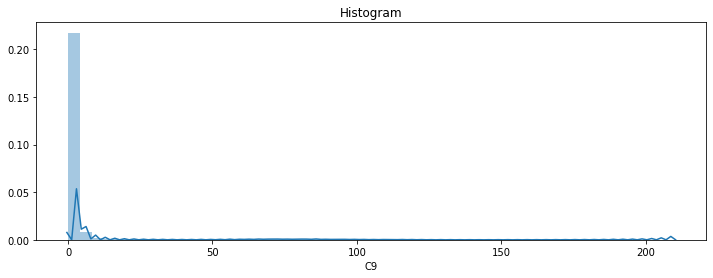

10. Plot for C10
Plots for variable : C10 can't be plotted
11. Plot for C11


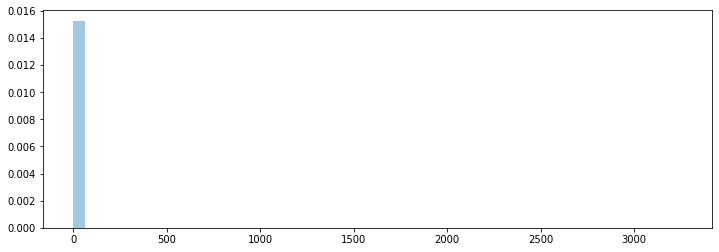

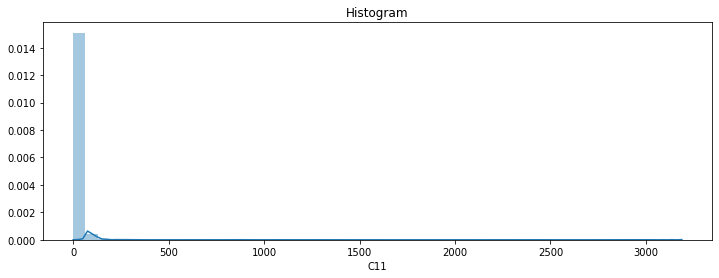

12. Plot for C12
Plots for variable : C12 can't be plotted
13. Plot for C13


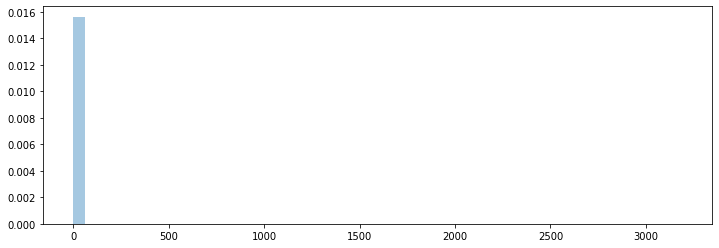

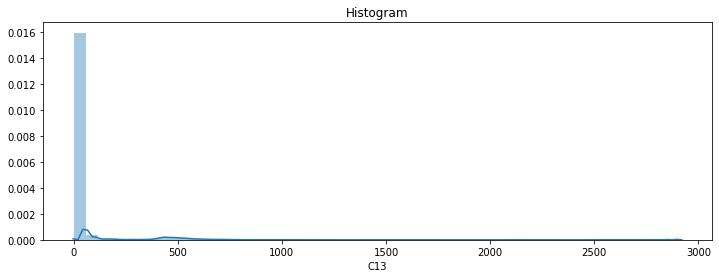

14. Plot for C14


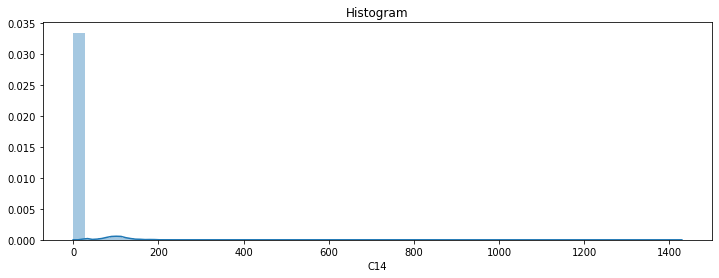

In [3]:
# Using fast_ml function to get univariate numerical plots for selected variables
check_vars_num = ['C'+str(i) for i in range(1,15)]
eda_numerical_plots(trans, check_vars_num, normality_check=False)

In [8]:
# Basic descriptive statistics to understand the spread better
trans[check_vars_num].describe().T

,count,mean,std,min,25%,50%,75%,max
C1,200000.0,13.937255,131.594011,0.0,1.0,1.0,3.0,4684.0
C2,200000.0,15.068470,152.111531,0.0,1.0,1.0,3.0,5692.0
C3,200000.0,0.005935,0.159405,0.0,0.0,0.0,0.0,25.0
C4,200000.0,4.004065,67.917913,0.0,0.0,0.0,0.0,2252.0
C5,200000.0,5.580375,25.789691,0.0,0.0,0.0,1.0,335.0
C6,200000.0,8.986190,70.606666,0.0,1.0,1.0,2.0,2252.0
C7,200000.0,2.775405,60.771755,0.0,0.0,0.0,0.0,2256.0
C8,200000.0,5.035945,94.096996,0.0,0.0,0.0,0.0,3332.0
C9,200000.0,4.482565,16.649475,0.0,0.0,1.0,2.0,210.0
C10,200000.0,5.116815,94.291235,0.0,0.0,0.0,0.0,3256.0


In [20]:
# More deeper look into the percentiles to take an idea on the binning of these variables
for var in check_vars_num:
    print (var, '\t', np.percentile(trans[var], [10,20,30,40,50,60,70,80,90,95,98]), '\t max' , max(trans[var]))

C1 	 [  1.   1.   1.   1.   1.   2.   2.   3.   7.  22. 131.] 	 max 4684.0
C2 	 [  1.   1.   1.   1.   1.   2.   2.   4.   7.  28. 121.] 	 max 5692.0
C3 	 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 	 max 25.0
C4 	 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 3.] 	 max 2252.0
C5 	 [  0.   0.   0.   0.   0.   0.   1.   1.   3.   9. 118.] 	 max 335.0
C6 	 [ 1.  1.  1.  1.  1.  1.  2.  2.  5. 15. 94.] 	 max 2252.0
C7 	 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2.] 	 max 2256.0
C8 	 [0. 0. 0. 0. 0. 0. 0. 1. 1. 2. 6.] 	 max 3332.0
C9 	 [ 0.  0.  0.  1.  1.  1.  2.  2.  4.  9. 78.] 	 max 210.0
C10 	 [0. 0. 0. 0. 0. 0. 0. 1. 1. 2. 5.] 	 max 3256.0
C11 	 [ 1.  1.  1.  1.  1.  1.  2.  2.  4. 15. 94.] 	 max 3188.0
C12 	 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 3.] 	 max 3188.0
C13 	 [  1.   1.   1.   2.   3.   5.   9.  17.  38. 102. 492.] 	 max 2918.0
C14 	 [  1.   1.   1.   1.   1.   1.   2.   3.   5.  14. 106.] 	 max 1429.0


1. Plot for C1


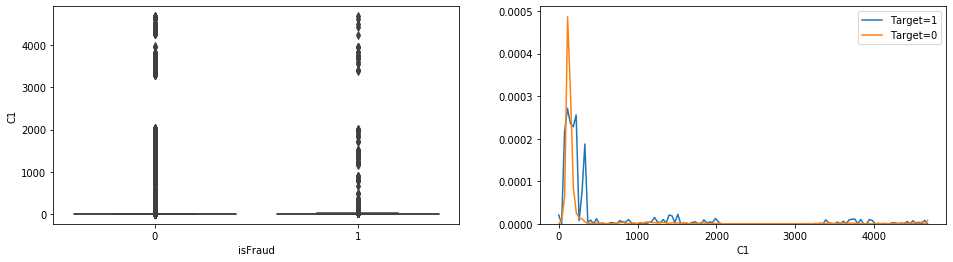

2. Plot for C2


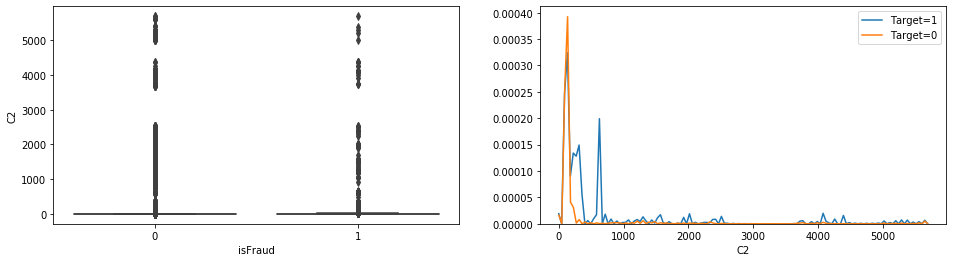

3. Plot for C3
Plots for variable : C3 can't be plotted
4. Plot for C4
Plots for variable : C4 can't be plotted
5. Plot for C5
Plots for variable : C5 can't be plotted
6. Plot for C6


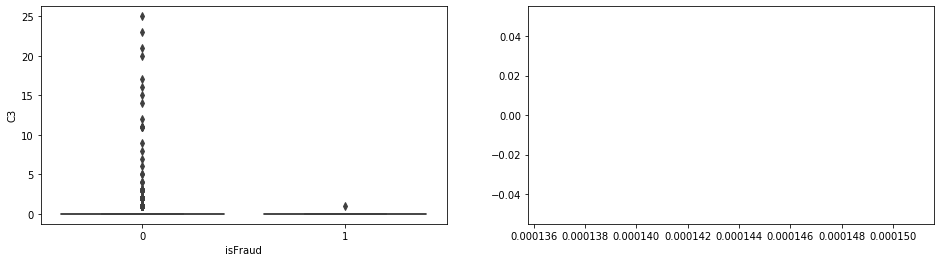

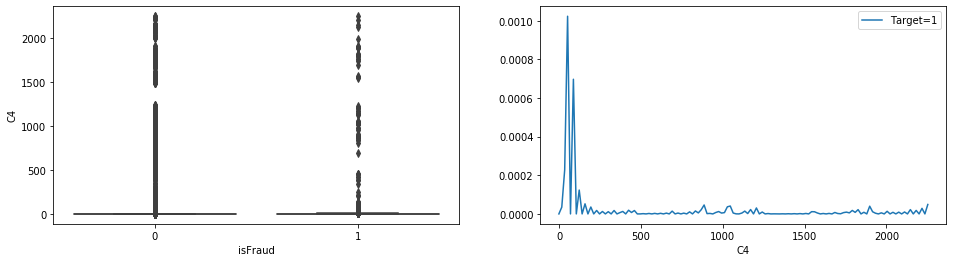

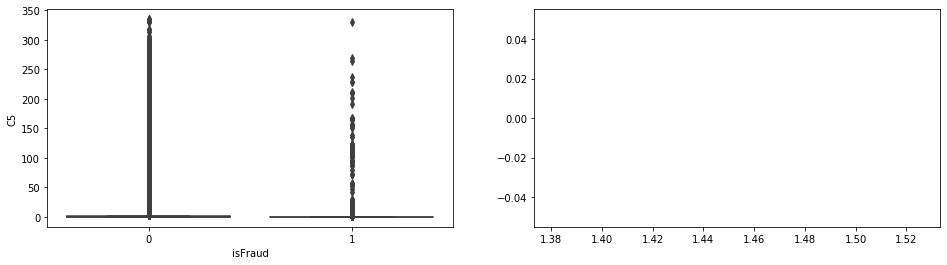

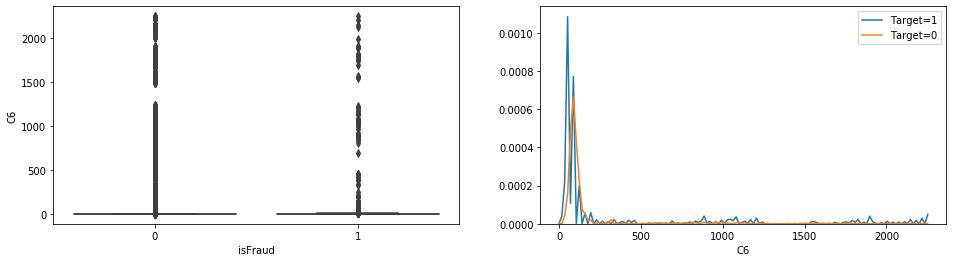

7. Plot for C7
Plots for variable : C7 can't be plotted
8. Plot for C8
Plots for variable : C8 can't be plotted
9. Plot for C9


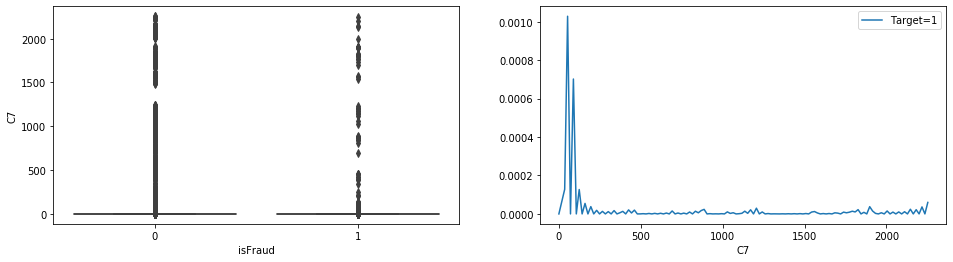

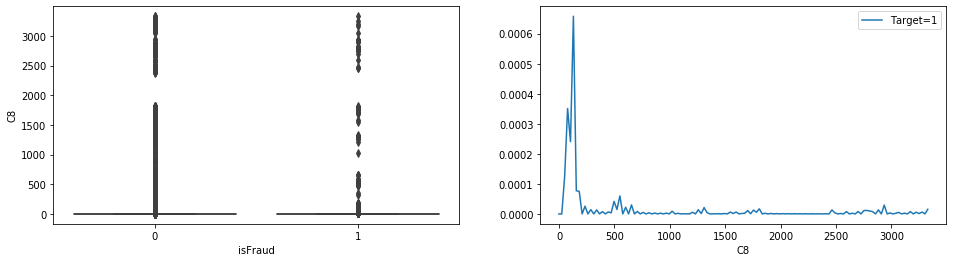

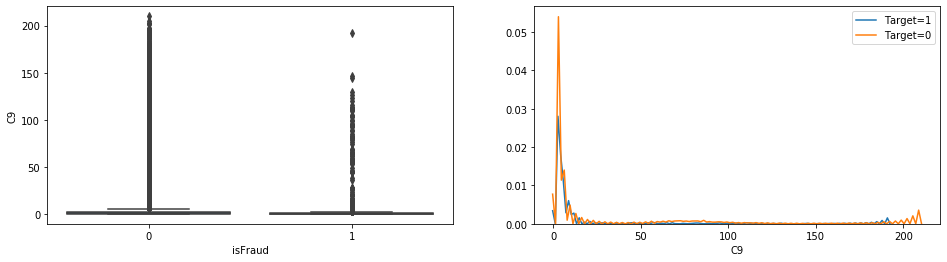

10. Plot for C10
Plots for variable : C10 can't be plotted
11. Plot for C11


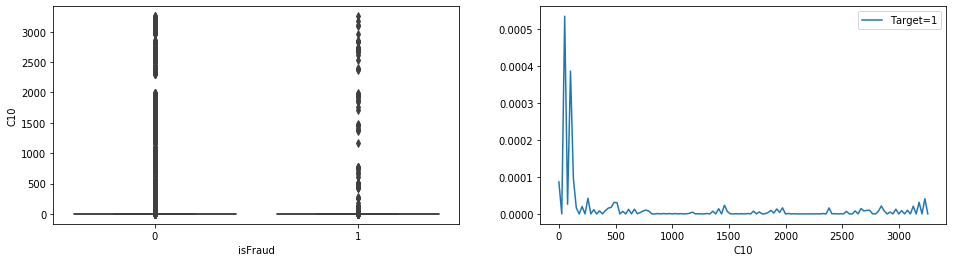

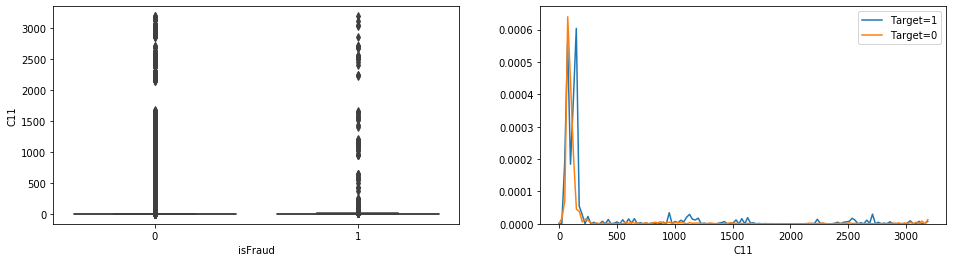

12. Plot for C12
Plots for variable : C12 can't be plotted
13. Plot for C13


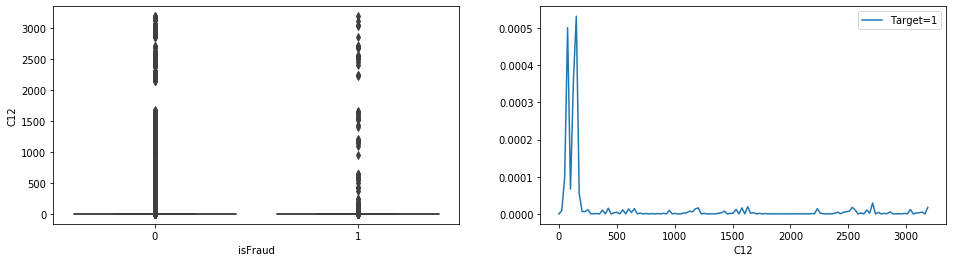

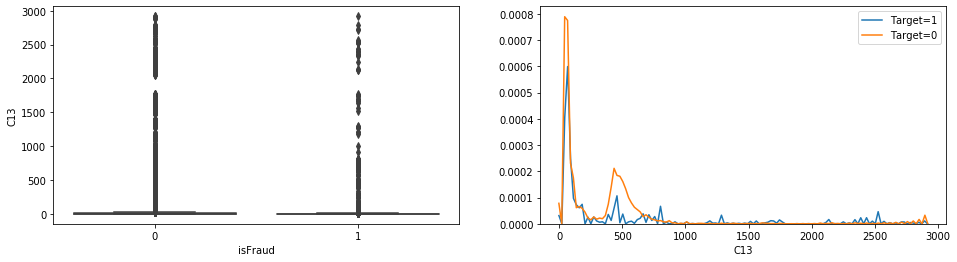

14. Plot for C14


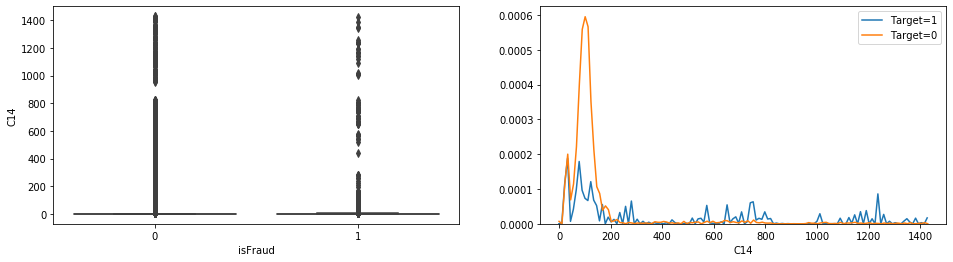

In [11]:
# Let's look at the bivariate plots between numeric C variables and target
# Using fast_ml function to get all the plots
check_vars_num = ['C'+str(i) for i in range(1,15)]
eda_numerical_plots_with_target(trans, check_vars_num, 
                                  target = 'isFraud', model='clf')

### Cards Variable

1. Plot for card1


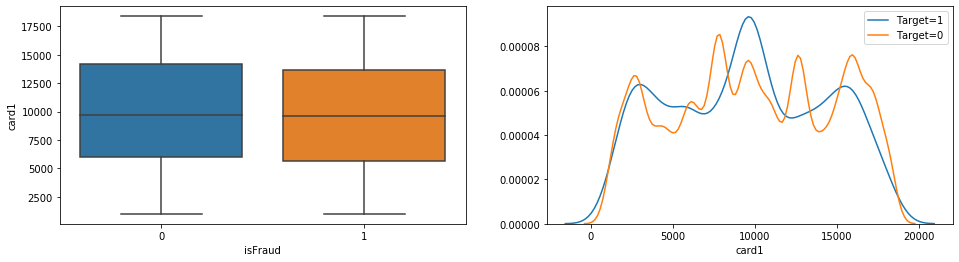

2. Plot for card2


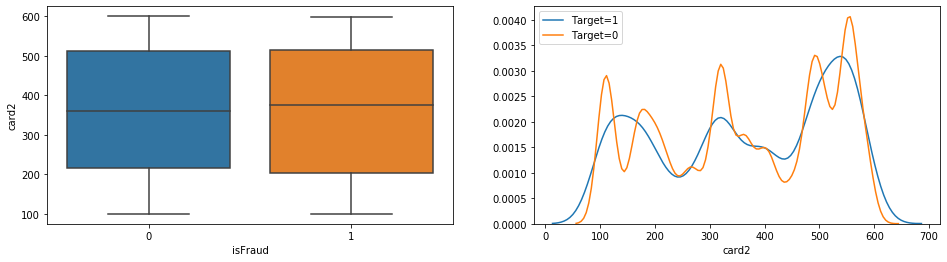

3. Plot for card3
Plots for variable : card3 can't be plotted
4. Plot for card5


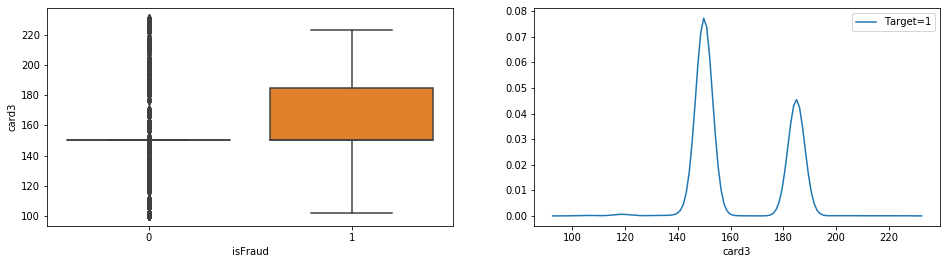

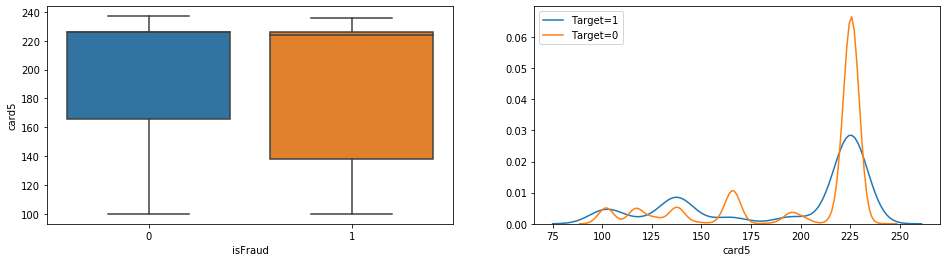

In [8]:
# Let's look at the bivariate plots between numeric cards variable and target
cards_list = ['card1', 'card2','card3', 'card5']
eda_numerical_plots_with_target(trans, cards_list, target = 'isFraud', model='clf')

## Check Missing Values 

#### Looking at the distribution plots to understand which imputation technique will suit for each variable

### Cards Variable

1. Plot for card4


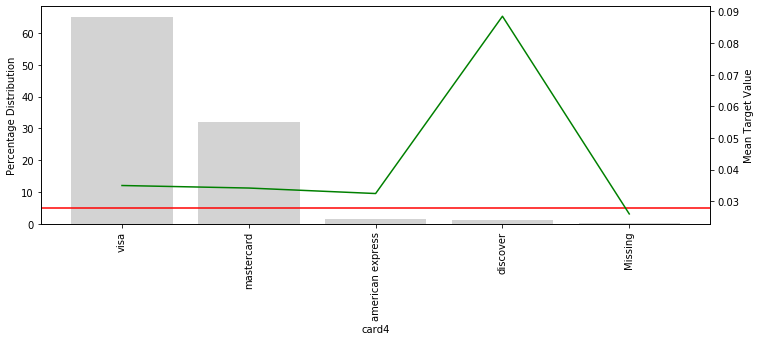

card4,visa,mastercard,american express,discover,Missing
count,130219.000000,64118.000000,2807.000000,2317.000000,539.000000
perc,65.109500,32.059000,1.403500,1.158500,0.269500
isFraud,0.034956,0.034156,0.032419,0.088476,0.025974



2. Plot for card6


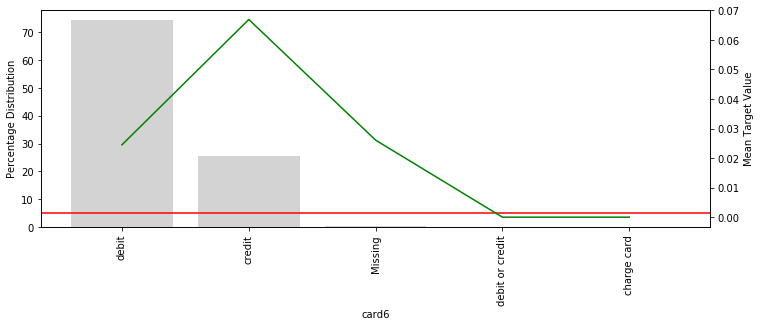

card6,debit,credit,Missing,debit or credit,charge card
count,148724.000000,50725.00000,537.000000,10.000,4.000
perc,74.362000,25.36250,0.268500,0.005,0.002
isFraud,0.024502,0.06691,0.026071,0.000,0.000


In [15]:
eda_categorical_plots_with_target(trans, ['card4', 'card6'], 
                                  target = 'isFraud', add_missing=True, add_rare=False, rare_tol=5)

### M1-M9

1. Plot for M1


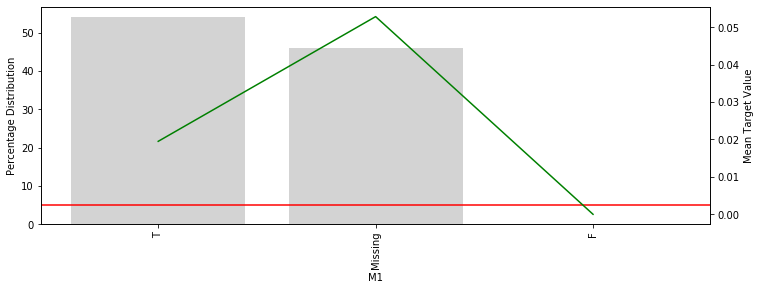

M1,T,Missing,F
count,108127.000000,91865.000000,8.000
perc,54.063500,45.932500,0.004
isFraud,0.019496,0.052817,0.000



2. Plot for M2


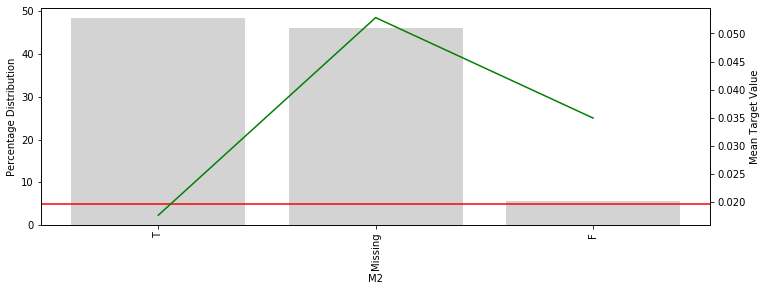

M2,T,Missing,F
count,96723.000000,91865.000000,11412.000000
perc,48.361500,45.932500,5.706000
isFraud,0.017669,0.052817,0.034963



3. Plot for M3


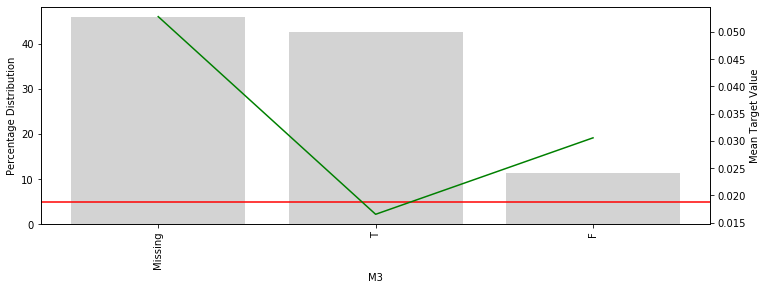

M3,Missing,T,F
count,91865.000000,85404.000000,22731.000000
perc,45.932500,42.702000,11.365500
isFraud,0.052817,0.016545,0.030575



4. Plot for M4


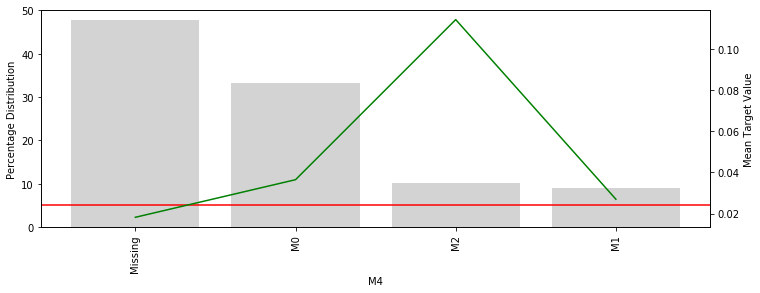

M4,Missing,M0,M2,M1
count,95491.00000,66336.000000,20329.000000,17844.000000
perc,47.74550,33.168000,10.164500,8.922000
isFraud,0.01818,0.036466,0.114319,0.026956



5. Plot for M5


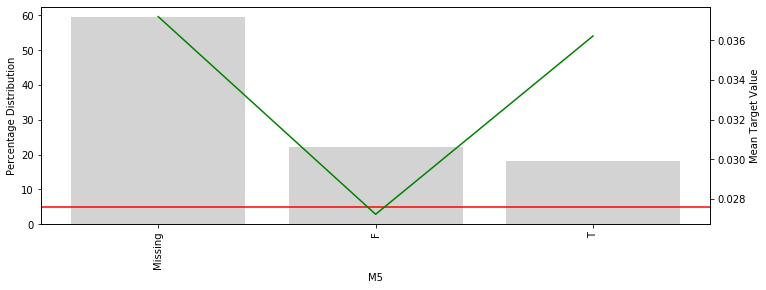

M5,Missing,F,T
count,118954.000000,44583.000000,36463.000000
perc,59.477000,22.291500,18.231500
isFraud,0.037208,0.027208,0.036229



6. Plot for M6


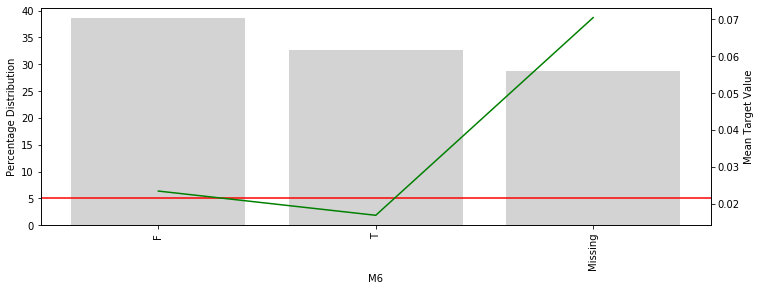

M6,F,T,Missing
count,77201.000000,65224.000000,57575.000000
perc,38.600500,32.612000,28.787500
isFraud,0.023393,0.016819,0.070465



7. Plot for M7


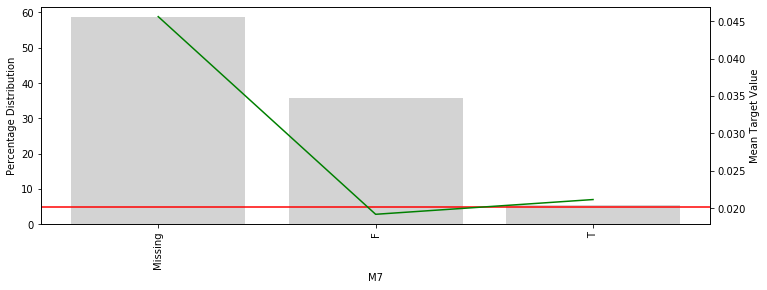

M7,Missing,F,T
count,117389.000000,71498.000000,11113.000000
perc,58.694500,35.749000,5.556500
isFraud,0.045609,0.019175,0.021146



8. Plot for M8


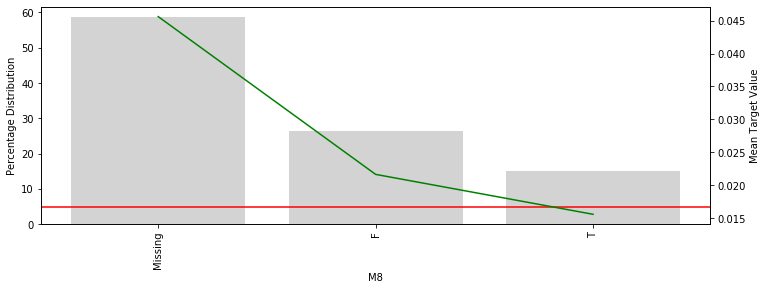

M8,Missing,F,T
count,117385.000000,52578.000000,30037.000000
perc,58.692500,26.289000,15.018500
isFraud,0.045611,0.021644,0.015581



9. Plot for M9


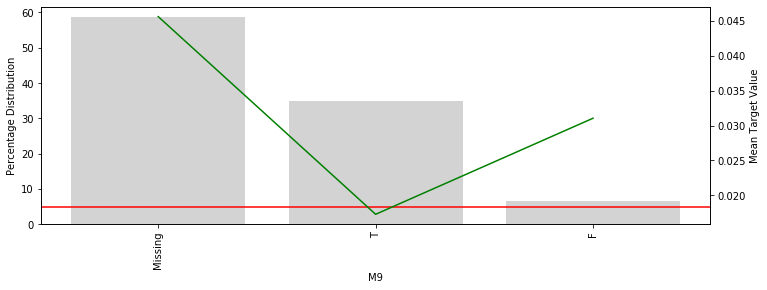

M9,Missing,T,F
count,117385.000000,69701.000000,12914.000000
perc,58.692500,34.850500,6.457000
isFraud,0.045611,0.017288,0.031052


In [6]:
check_vars1 = ['M'+str(i) for i in range(1,10)]
eda_categorical_plots_with_target(trans, check_vars1, target = 'isFraud', add_missing=True, add_rare=False, rare_tol=5)

### V1-V11

1. Plot for V1


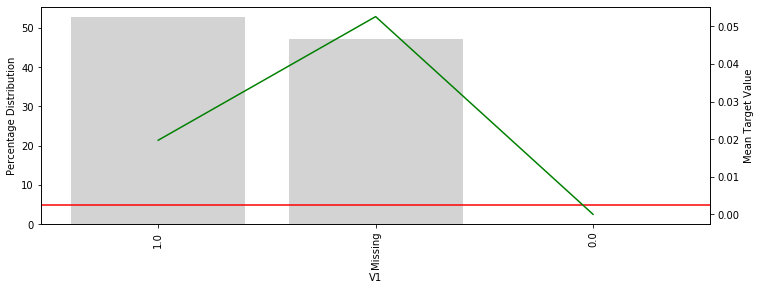

V1,1.0,Missing,0.0
count,105460.000000,94535.000000,5.0000
perc,52.730000,47.267500,0.0025
isFraud,0.019714,0.052605,0.0000



Cateroical Plots after grouping into Rare Category


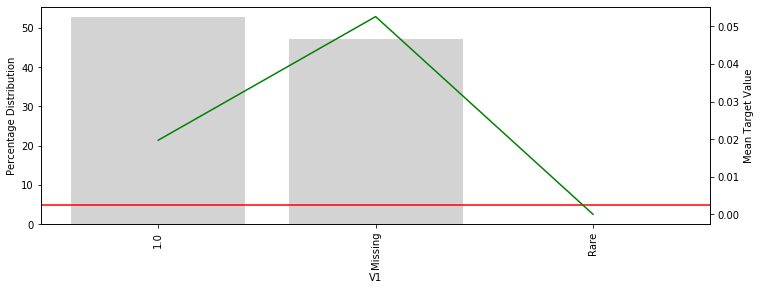

V1,1.0,Missing,Rare
count,105460.000000,94535.000000,5.0000
perc,52.730000,47.267500,0.0025
isFraud,0.019714,0.052605,0.0000



2. Plot for V2


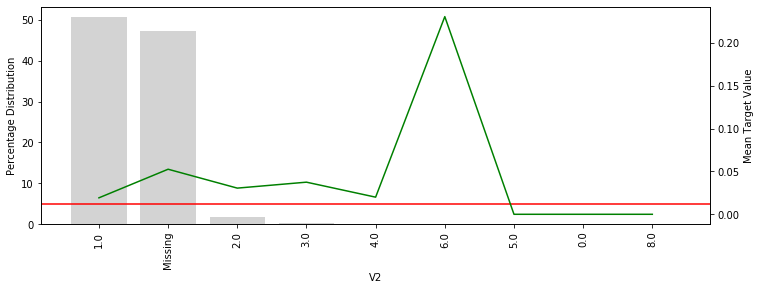

V2,1.0,Missing,2.0,3.0,4.0,6.0,5.0,0.0,8.0
count,101289.000000,94535.000000,3698.000000,400.0000,50.000,13.000000,9.0000,5.0000,1.0000
perc,50.644500,47.267500,1.849000,0.2000,0.025,0.006500,0.0045,0.0025,0.0005
isFraud,0.019222,0.052605,0.030557,0.0375,0.020,0.230769,0.0000,0.0000,0.0000



Cateroical Plots after grouping into Rare Category


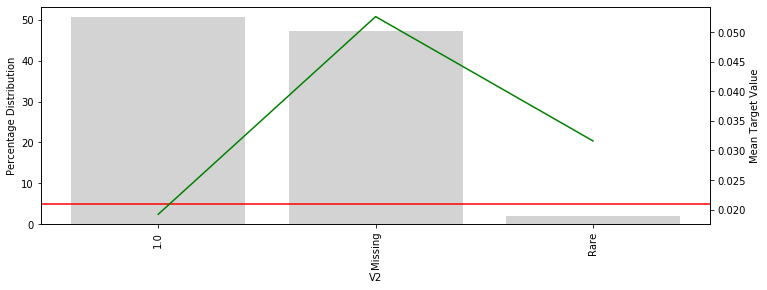

V2,1.0,Missing,Rare
count,101289.000000,94535.000000,4176.000000
perc,50.644500,47.267500,2.088000
isFraud,0.019222,0.052605,0.031609



3. Plot for V3


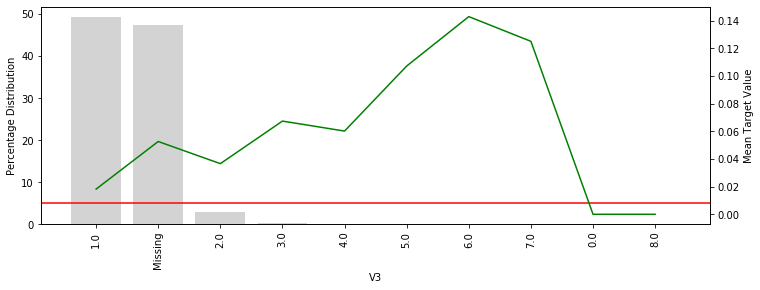

V3,1.0,Missing,2.0,3.0,4.0,5.0,6.0,7.0,0.0,8.0
count,98518.00000,94535.000000,5984.000000,772.000000,133.00000,28.000000,14.000000,8.000,5.0000,3.0000
perc,49.25900,47.267500,2.992000,0.386000,0.06650,0.014000,0.007000,0.004,0.0025,0.0015
isFraud,0.01821,0.052605,0.036598,0.067358,0.06015,0.107143,0.142857,0.125,0.0000,0.0000



Cateroical Plots after grouping into Rare Category


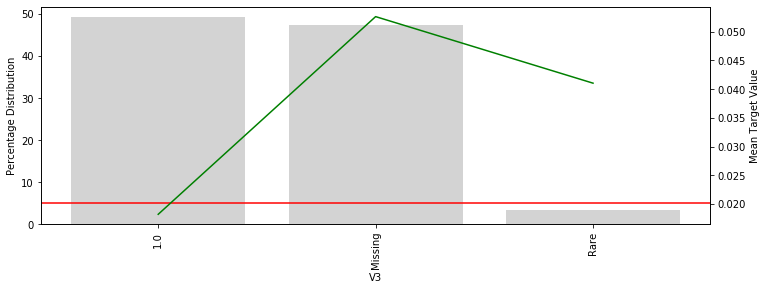

V3,1.0,Missing,Rare
count,98518.00000,94535.000000,6947.000000
perc,49.25900,47.267500,3.473500
isFraud,0.01821,0.052605,0.041025



4. Plot for V4


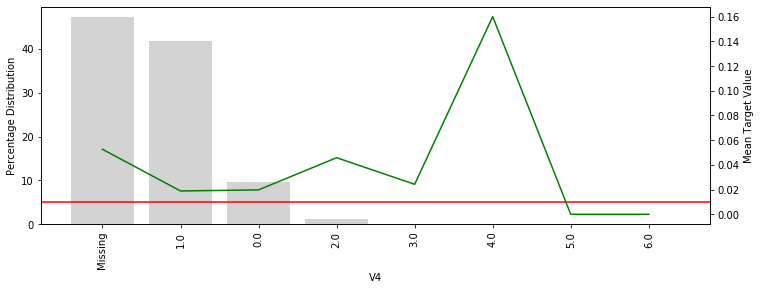

V4,Missing,1.0,0.0,2.0,3.0,4.0,5.0,6.0
count,94535.000000,83628.000000,19128.000000,2467.000000,206.000000,25.0000,9.0000,2.000
perc,47.267500,41.814000,9.564000,1.233500,0.103000,0.0125,0.0045,0.001
isFraud,0.052605,0.018881,0.019762,0.045805,0.024272,0.1600,0.0000,0.000



Cateroical Plots after grouping into Rare Category


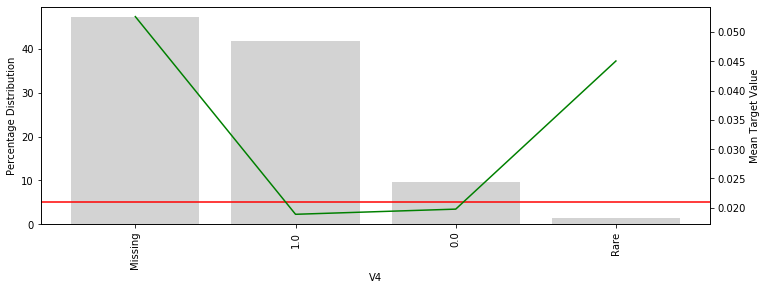

V4,Missing,1.0,0.0,Rare
count,94535.000000,83628.000000,19128.000000,2709.000000
perc,47.267500,41.814000,9.564000,1.354500
isFraud,0.052605,0.018881,0.019762,0.045035



5. Plot for V5


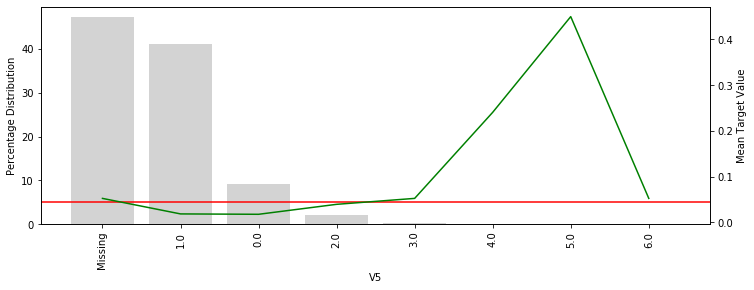

V5,Missing,1.0,0.0,2.0,3.0,4.0,5.0,6.0
count,94535.000000,82463.000000,18304.000000,4187.000000,418.000000,54.000000,20.00,19.000000
perc,47.267500,41.231500,9.152000,2.093500,0.209000,0.027000,0.01,0.009500
isFraud,0.052605,0.018687,0.017865,0.039647,0.052632,0.240741,0.45,0.052632



Cateroical Plots after grouping into Rare Category


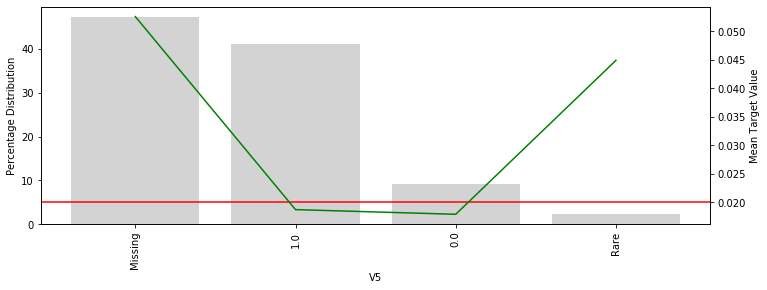

V5,Missing,1.0,0.0,Rare
count,94535.000000,82463.000000,18304.000000,4698.000000
perc,47.267500,41.231500,9.152000,2.349000
isFraud,0.052605,0.018687,0.017865,0.044913



6. Plot for V6


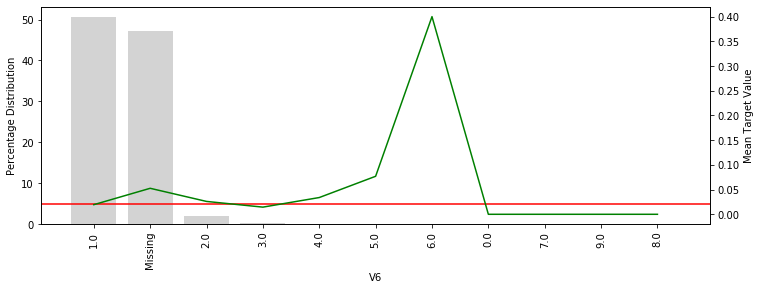

V6,1.0,Missing,2.0,3.0,4.0,5.0,6.0,0.0,7.0,9.0,8.0
count,101192.000000,94535.000000,3842.000000,345.000000,59.000000,13.000000,5.0000,5.0000,2.000,1.0000,1.0000
perc,50.596000,47.267500,1.921000,0.172500,0.029500,0.006500,0.0025,0.0025,0.001,0.0005,0.0005
isFraud,0.019458,0.052605,0.026028,0.014493,0.033898,0.076923,0.4000,0.0000,0.000,0.0000,0.0000



Cateroical Plots after grouping into Rare Category


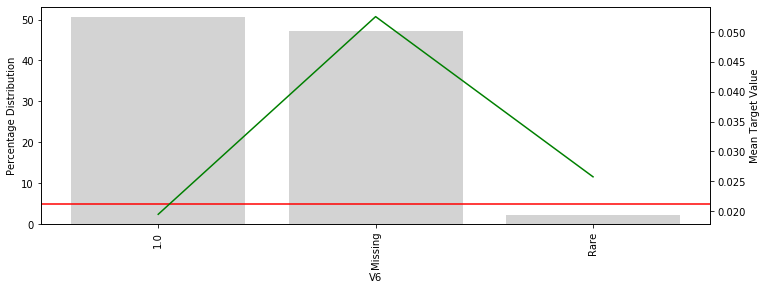

V6,1.0,Missing,Rare
count,101192.000000,94535.000000,4273.000000
perc,50.596000,47.267500,2.136500
isFraud,0.019458,0.052605,0.025743



7. Plot for V7


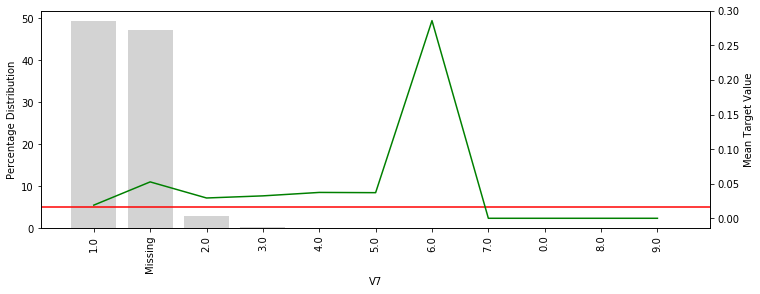

V7,1.0,Missing,2.0,3.0,4.0,5.0,6.0,7.0,0.0,8.0,9.0
count,98764.000000,94535.000000,5930.000000,617.000000,107.000000,27.000000,7.000000,5.0000,5.0000,2.000,1.0000
perc,49.382000,47.267500,2.965000,0.308500,0.053500,0.013500,0.003500,0.0025,0.0025,0.001,0.0005
isFraud,0.019015,0.052605,0.029342,0.032415,0.037383,0.037037,0.285714,0.0000,0.0000,0.000,0.0000



Cateroical Plots after grouping into Rare Category


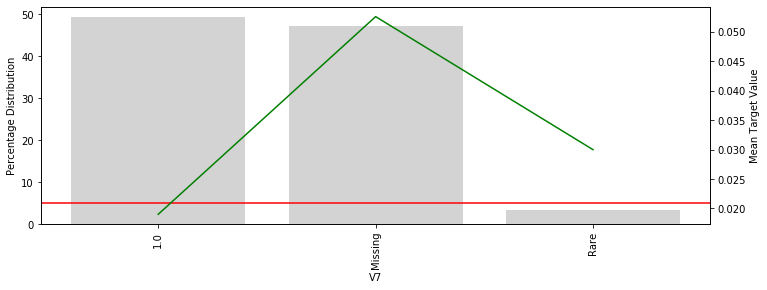

V7,1.0,Missing,Rare
count,98764.000000,94535.000000,6701.000000
perc,49.382000,47.267500,3.350500
isFraud,0.019015,0.052605,0.029996



8. Plot for V8


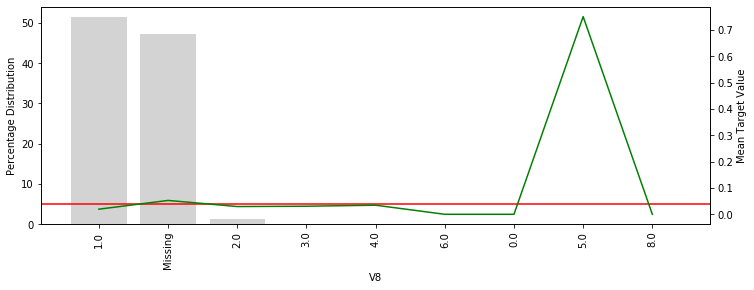

V8,1.0,Missing,2.0,3.0,4.0,6.0,0.0,5.0,8.0
count,102874.000000,94535.000000,2345.000000,196.000000,29.000000,10.000,6.000,4.000,1.0000
perc,51.437000,47.267500,1.172500,0.098000,0.014500,0.005,0.003,0.002,0.0005
isFraud,0.019441,0.052605,0.029424,0.030612,0.034483,0.000,0.000,0.750,0.0000



Cateroical Plots after grouping into Rare Category


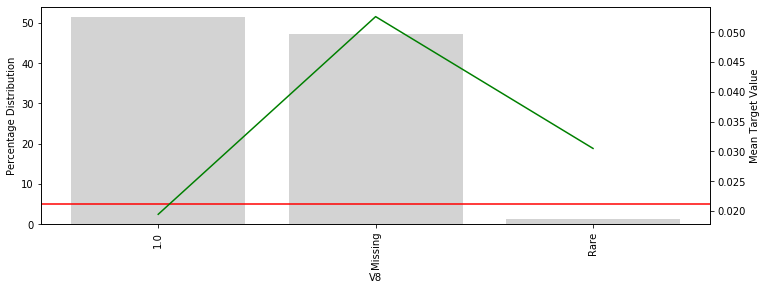

V8,1.0,Missing,Rare
count,102874.000000,94535.000000,2591.00000
perc,51.437000,47.267500,1.29550
isFraud,0.019441,0.052605,0.03049



9. Plot for V9


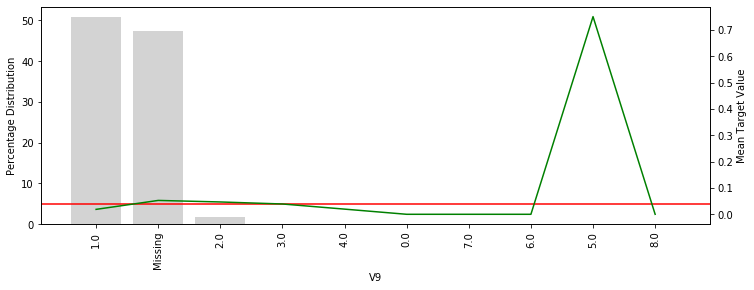

V9,1.0,Missing,2.0,3.0,4.0,0.0,7.0,6.0,5.0,8.0
count,101579.000000,94535.000000,3507.000000,307.000000,51.000000,6.000,5.0000,5.0000,4.000,1.0000
perc,50.789500,47.267500,1.753500,0.153500,0.025500,0.003,0.0025,0.0025,0.002,0.0005
isFraud,0.018695,0.052605,0.046764,0.039088,0.019608,0.000,0.0000,0.0000,0.750,0.0000



Cateroical Plots after grouping into Rare Category


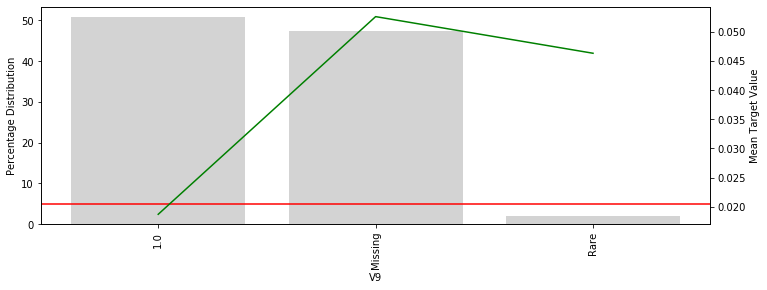

V9,1.0,Missing,Rare
count,101579.000000,94535.000000,3886.00000
perc,50.789500,47.267500,1.94300
isFraud,0.018695,0.052605,0.04632



10. Plot for V10


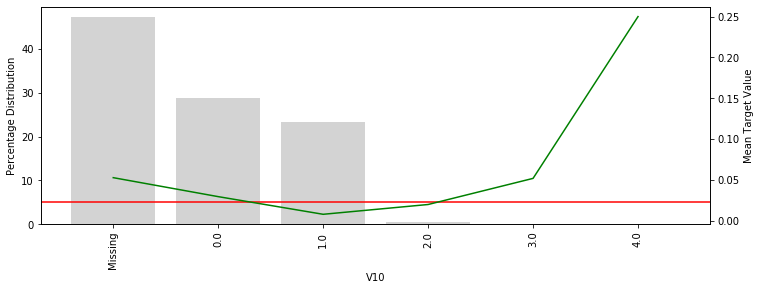

V10,Missing,0.0,1.0,2.0,3.0,4.0
count,94535.000000,57793.000000,46595.000000,1015.000000,58.000000,4.000
perc,47.267500,28.896500,23.297500,0.507500,0.029000,0.002
isFraud,0.052605,0.029346,0.007705,0.019704,0.051724,0.250



Cateroical Plots after grouping into Rare Category


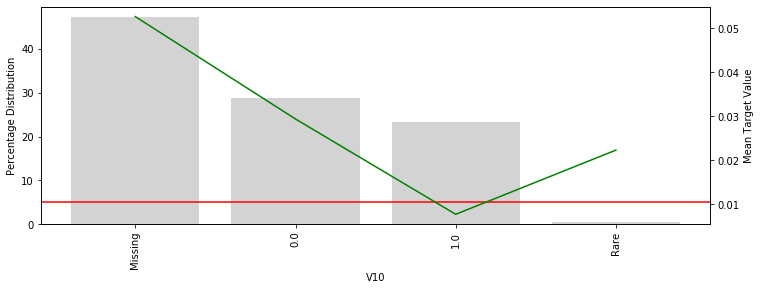

V10,Missing,0.0,1.0,Rare
count,94535.000000,57793.000000,46595.000000,1077.000000
perc,47.267500,28.896500,23.297500,0.538500
isFraud,0.052605,0.029346,0.007705,0.022284



11. Plot for V11


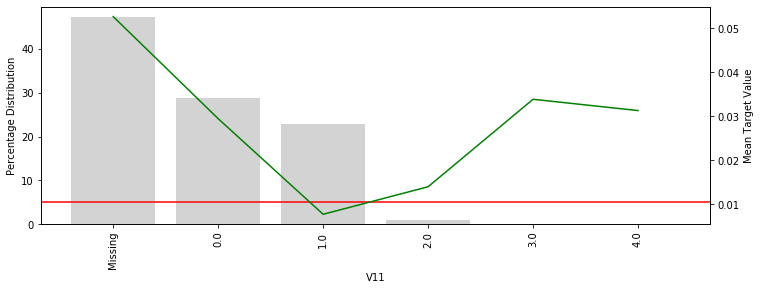

V11,Missing,0.0,1.0,2.0,3.0,4.0
count,94535.000000,57579.000000,45749.000000,1866.000000,207.000000,64.00000
perc,47.267500,28.789500,22.874500,0.933000,0.103500,0.03200
isFraud,0.052605,0.029403,0.007672,0.013934,0.033816,0.03125



Cateroical Plots after grouping into Rare Category


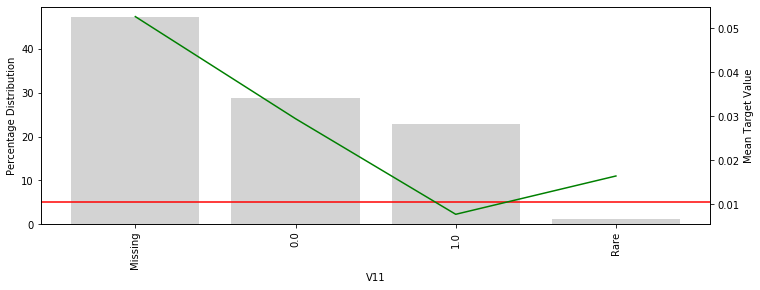

V11,Missing,0.0,1.0,Rare
count,94535.000000,57579.000000,45749.000000,2137.000000
perc,47.267500,28.789500,22.874500,1.068500
isFraud,0.052605,0.029403,0.007672,0.016378


In [9]:
check_vars2 = ['V'+str(i) for i in range(1,12)]
eda_categorical_plots_with_target(trans, check_vars2, target = 'isFraud', add_missing=True, add_rare='both', rare_tol=5)

1. Plot for V1


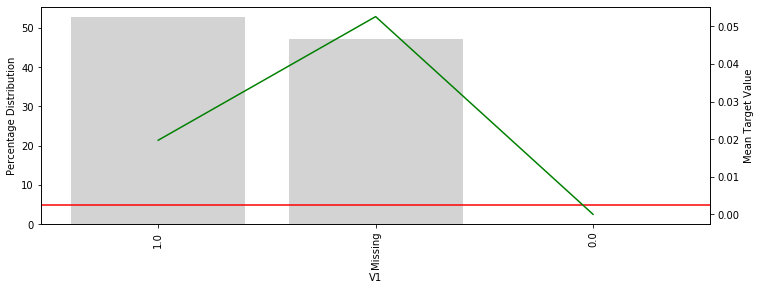

V1,1.0,Missing,0.0
count,105460.000000,94535.000000,5.0000
perc,52.730000,47.267500,0.0025
isFraud,0.019714,0.052605,0.0000



1. Plot for V1


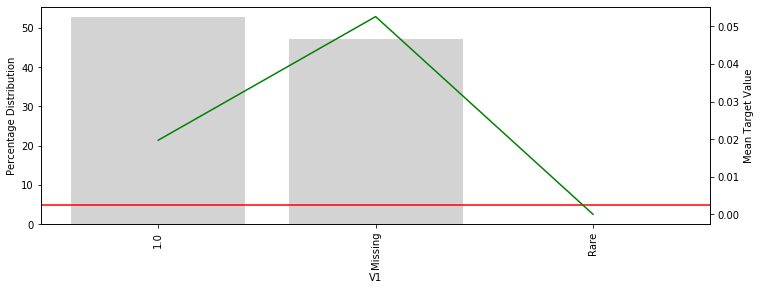

V1,1.0,Missing,Rare
count,105460.000000,94535.000000,5.0000
perc,52.730000,47.267500,0.0025
isFraud,0.019714,0.052605,0.0000



1. Plot for V2


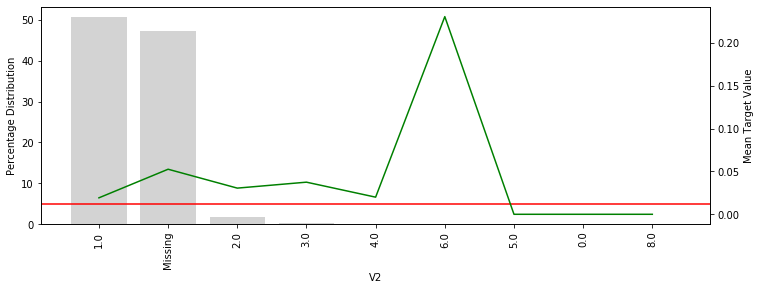

V2,1.0,Missing,2.0,3.0,4.0,6.0,5.0,0.0,8.0
count,101289.000000,94535.000000,3698.000000,400.0000,50.000,13.000000,9.0000,5.0000,1.0000
perc,50.644500,47.267500,1.849000,0.2000,0.025,0.006500,0.0045,0.0025,0.0005
isFraud,0.019222,0.052605,0.030557,0.0375,0.020,0.230769,0.0000,0.0000,0.0000



1. Plot for V2


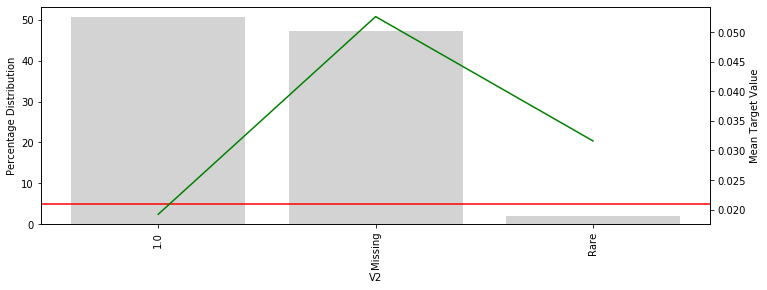

V2,1.0,Missing,Rare
count,101289.000000,94535.000000,4176.000000
perc,50.644500,47.267500,2.088000
isFraud,0.019222,0.052605,0.031609



1. Plot for V3


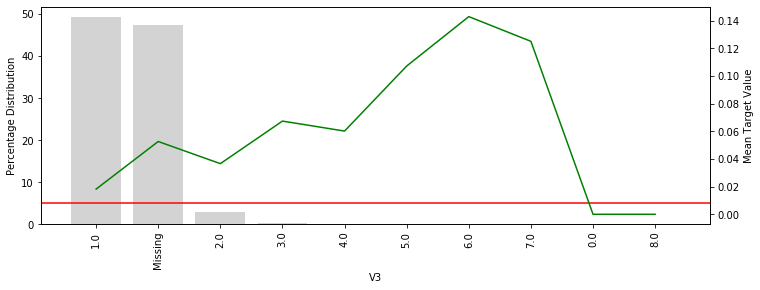

V3,1.0,Missing,2.0,3.0,4.0,5.0,6.0,7.0,0.0,8.0
count,98518.00000,94535.000000,5984.000000,772.000000,133.00000,28.000000,14.000000,8.000,5.0000,3.0000
perc,49.25900,47.267500,2.992000,0.386000,0.06650,0.014000,0.007000,0.004,0.0025,0.0015
isFraud,0.01821,0.052605,0.036598,0.067358,0.06015,0.107143,0.142857,0.125,0.0000,0.0000



1. Plot for V3


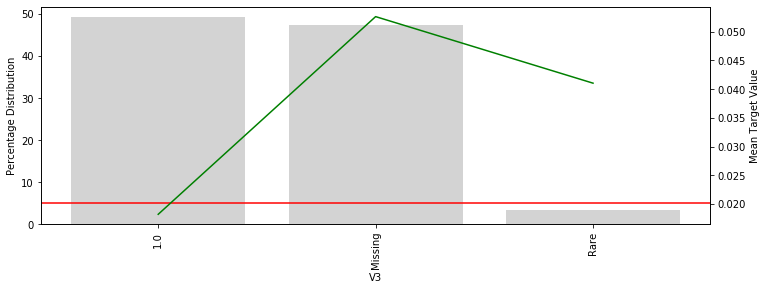

V3,1.0,Missing,Rare
count,98518.00000,94535.000000,6947.000000
perc,49.25900,47.267500,3.473500
isFraud,0.01821,0.052605,0.041025



1. Plot for V4


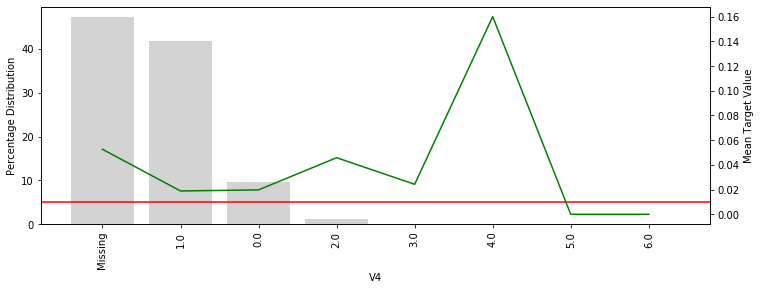

V4,Missing,1.0,0.0,2.0,3.0,4.0,5.0,6.0
count,94535.000000,83628.000000,19128.000000,2467.000000,206.000000,25.0000,9.0000,2.000
perc,47.267500,41.814000,9.564000,1.233500,0.103000,0.0125,0.0045,0.001
isFraud,0.052605,0.018881,0.019762,0.045805,0.024272,0.1600,0.0000,0.000



1. Plot for V4


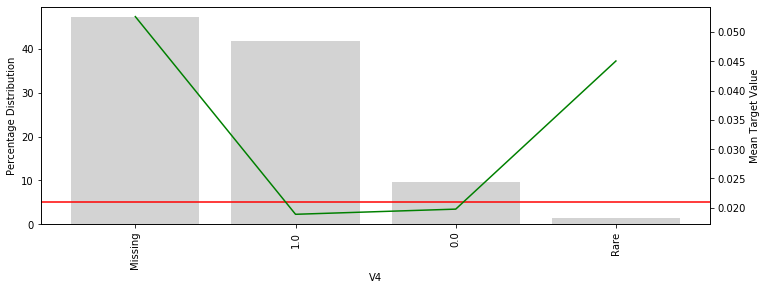

V4,Missing,1.0,0.0,Rare
count,94535.000000,83628.000000,19128.000000,2709.000000
perc,47.267500,41.814000,9.564000,1.354500
isFraud,0.052605,0.018881,0.019762,0.045035



1. Plot for V5


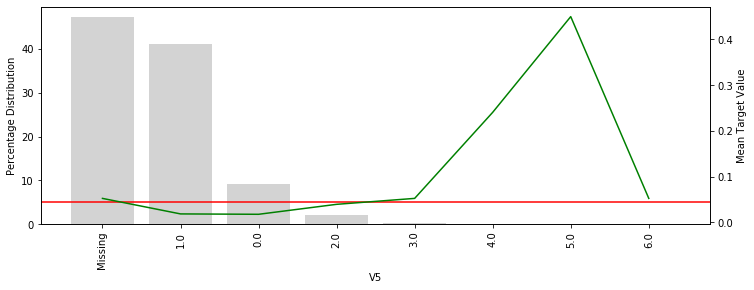

V5,Missing,1.0,0.0,2.0,3.0,4.0,5.0,6.0
count,94535.000000,82463.000000,18304.000000,4187.000000,418.000000,54.000000,20.00,19.000000
perc,47.267500,41.231500,9.152000,2.093500,0.209000,0.027000,0.01,0.009500
isFraud,0.052605,0.018687,0.017865,0.039647,0.052632,0.240741,0.45,0.052632



1. Plot for V5


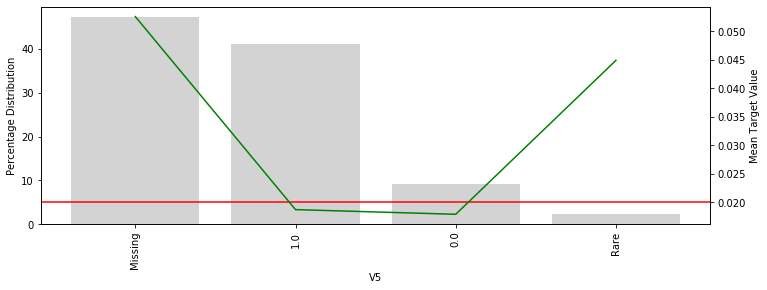

V5,Missing,1.0,0.0,Rare
count,94535.000000,82463.000000,18304.000000,4698.000000
perc,47.267500,41.231500,9.152000,2.349000
isFraud,0.052605,0.018687,0.017865,0.044913



1. Plot for V6


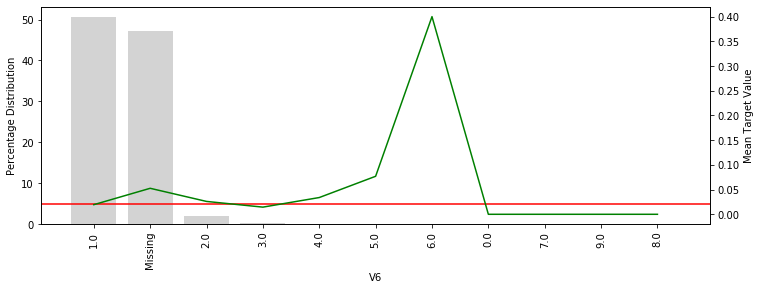

V6,1.0,Missing,2.0,3.0,4.0,5.0,6.0,0.0,7.0,9.0,8.0
count,101192.000000,94535.000000,3842.000000,345.000000,59.000000,13.000000,5.0000,5.0000,2.000,1.0000,1.0000
perc,50.596000,47.267500,1.921000,0.172500,0.029500,0.006500,0.0025,0.0025,0.001,0.0005,0.0005
isFraud,0.019458,0.052605,0.026028,0.014493,0.033898,0.076923,0.4000,0.0000,0.000,0.0000,0.0000



1. Plot for V6


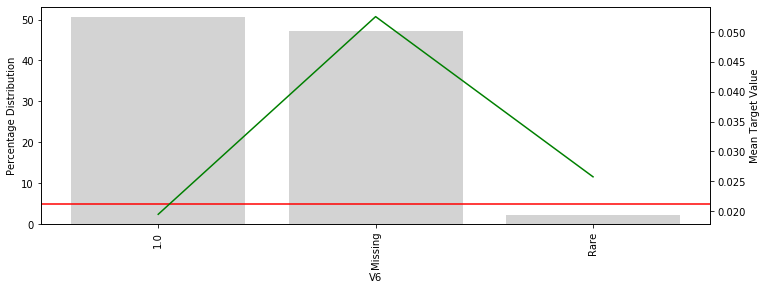

V6,1.0,Missing,Rare
count,101192.000000,94535.000000,4273.000000
perc,50.596000,47.267500,2.136500
isFraud,0.019458,0.052605,0.025743



1. Plot for V7


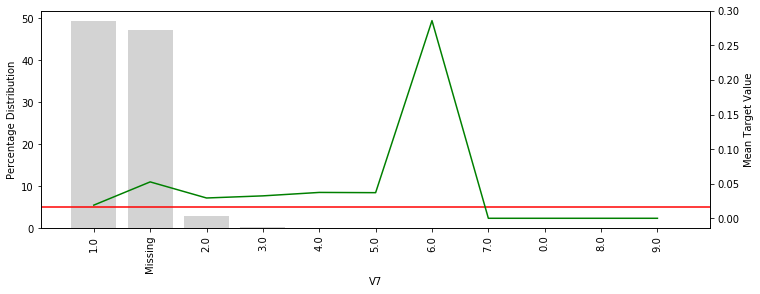

V7,1.0,Missing,2.0,3.0,4.0,5.0,6.0,7.0,0.0,8.0,9.0
count,98764.000000,94535.000000,5930.000000,617.000000,107.000000,27.000000,7.000000,5.0000,5.0000,2.000,1.0000
perc,49.382000,47.267500,2.965000,0.308500,0.053500,0.013500,0.003500,0.0025,0.0025,0.001,0.0005
isFraud,0.019015,0.052605,0.029342,0.032415,0.037383,0.037037,0.285714,0.0000,0.0000,0.000,0.0000



1. Plot for V7


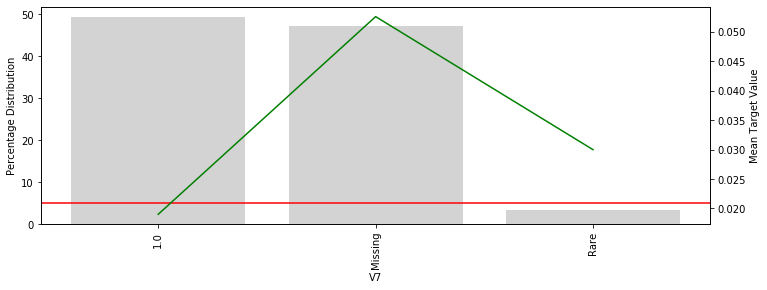

V7,1.0,Missing,Rare
count,98764.000000,94535.000000,6701.000000
perc,49.382000,47.267500,3.350500
isFraud,0.019015,0.052605,0.029996



1. Plot for V8


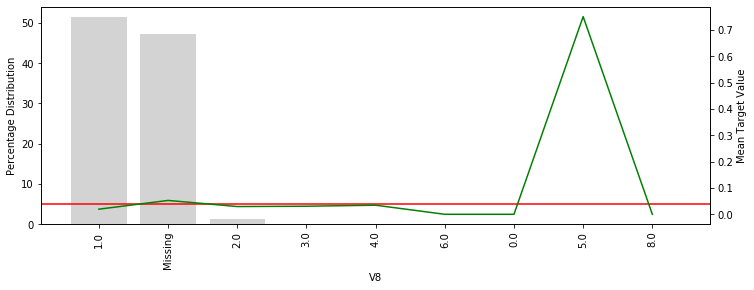

V8,1.0,Missing,2.0,3.0,4.0,6.0,0.0,5.0,8.0
count,102874.000000,94535.000000,2345.000000,196.000000,29.000000,10.000,6.000,4.000,1.0000
perc,51.437000,47.267500,1.172500,0.098000,0.014500,0.005,0.003,0.002,0.0005
isFraud,0.019441,0.052605,0.029424,0.030612,0.034483,0.000,0.000,0.750,0.0000



1. Plot for V8


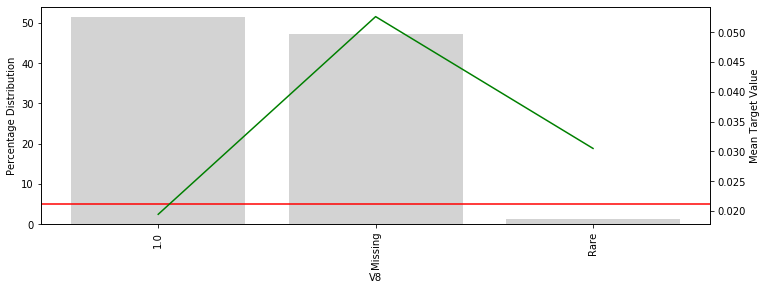

V8,1.0,Missing,Rare
count,102874.000000,94535.000000,2591.00000
perc,51.437000,47.267500,1.29550
isFraud,0.019441,0.052605,0.03049



1. Plot for V9


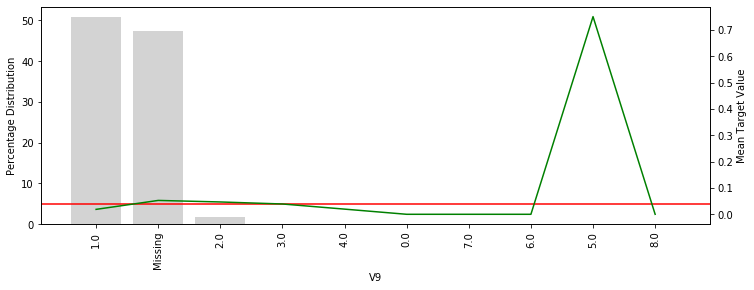

V9,1.0,Missing,2.0,3.0,4.0,0.0,7.0,6.0,5.0,8.0
count,101579.000000,94535.000000,3507.000000,307.000000,51.000000,6.000,5.0000,5.0000,4.000,1.0000
perc,50.789500,47.267500,1.753500,0.153500,0.025500,0.003,0.0025,0.0025,0.002,0.0005
isFraud,0.018695,0.052605,0.046764,0.039088,0.019608,0.000,0.0000,0.0000,0.750,0.0000



1. Plot for V9


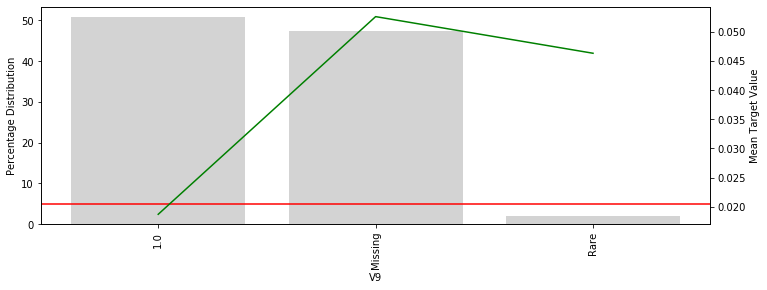

V9,1.0,Missing,Rare
count,101579.000000,94535.000000,3886.00000
perc,50.789500,47.267500,1.94300
isFraud,0.018695,0.052605,0.04632



1. Plot for V10


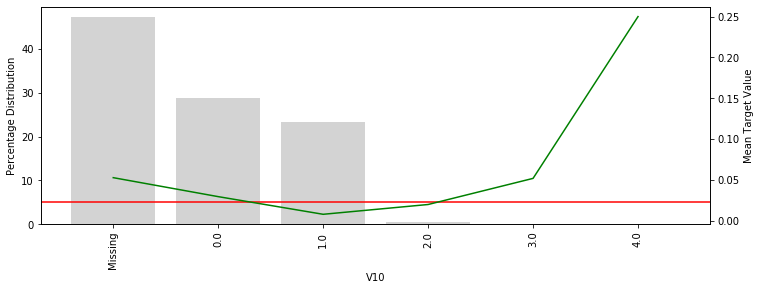

V10,Missing,0.0,1.0,2.0,3.0,4.0
count,94535.000000,57793.000000,46595.000000,1015.000000,58.000000,4.000
perc,47.267500,28.896500,23.297500,0.507500,0.029000,0.002
isFraud,0.052605,0.029346,0.007705,0.019704,0.051724,0.250



1. Plot for V10


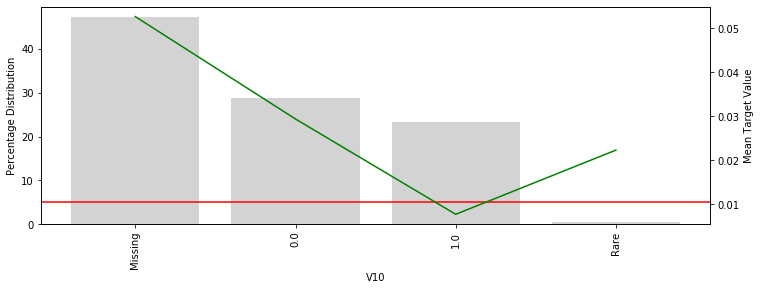

V10,Missing,0.0,1.0,Rare
count,94535.000000,57793.000000,46595.000000,1077.000000
perc,47.267500,28.896500,23.297500,0.538500
isFraud,0.052605,0.029346,0.007705,0.022284



1. Plot for V11


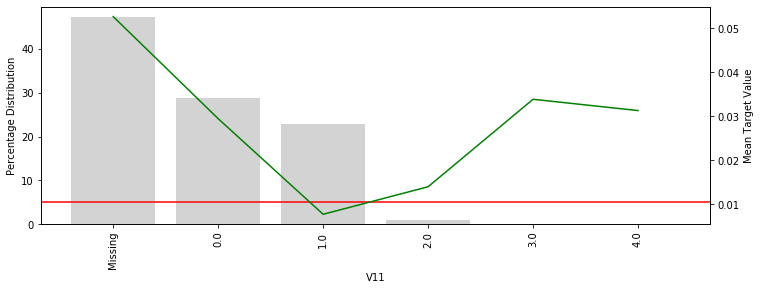

V11,Missing,0.0,1.0,2.0,3.0,4.0
count,94535.000000,57579.000000,45749.000000,1866.000000,207.000000,64.00000
perc,47.267500,28.789500,22.874500,0.933000,0.103500,0.03200
isFraud,0.052605,0.029403,0.007672,0.013934,0.033816,0.03125



1. Plot for V11


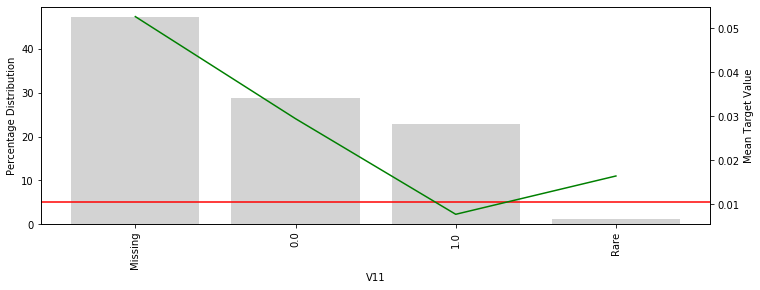

V11,Missing,0.0,1.0,Rare
count,94535.000000,57579.000000,45749.000000,2137.000000
perc,47.267500,28.789500,22.874500,1.068500
isFraud,0.052605,0.029403,0.007672,0.016378


In [18]:
check_vars2 = ['V'+str(i) for i in range(1,12)]
for var in check_vars2:
    eda_categorical_plots_with_target(trans, [var], target = 'isFraud', add_missing=True, add_rare=False, rare_tol=5)
    eda_categorical_plots_with_target(trans, [var], target = 'isFraud', add_missing=True, add_rare=True, rare_tol=5)

### V12-V34

1. Plot for V13


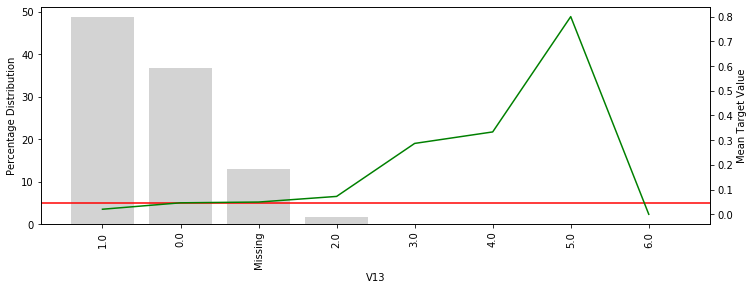

V13,1.0,0.0,Missing,2.0,3.0,4.0,5.0,6.0
count,97420.000000,73494.00000,25766.000000,3179.00000,129.000000,6.000000,5.0000,1.0000
perc,48.710000,36.74700,12.883000,1.58950,0.064500,0.003000,0.0025,0.0005
isFraud,0.020468,0.04648,0.049561,0.07235,0.286822,0.333333,0.8000,0.0000



2. Plot for V14


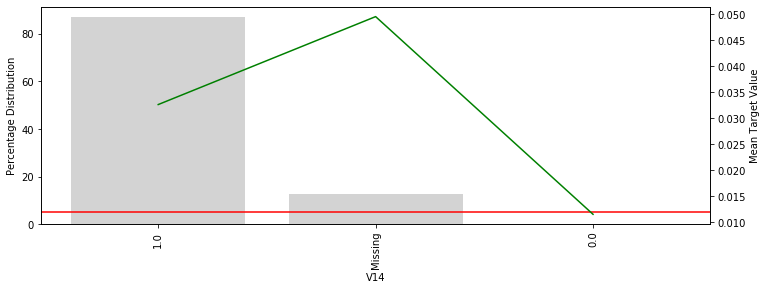

V14,1.0,Missing,0.0
count,174147.000000,25766.000000,87.000000
perc,87.073500,12.883000,0.043500
isFraud,0.032628,0.049561,0.011494



3. Plot for V15


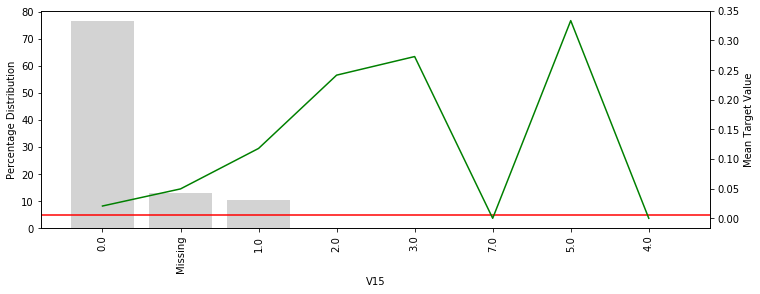

V15,0.0,Missing,1.0,2.0,3.0,7.0,5.0,4.0
count,153027.000000,25766.000000,21069.000000,116.000000,11.000000,6.000,3.000000,2.000
perc,76.513500,12.883000,10.534500,0.058000,0.005500,0.003,0.001500,0.001
isFraud,0.020709,0.049561,0.117803,0.241379,0.272727,0.000,0.333333,0.000



4. Plot for V16


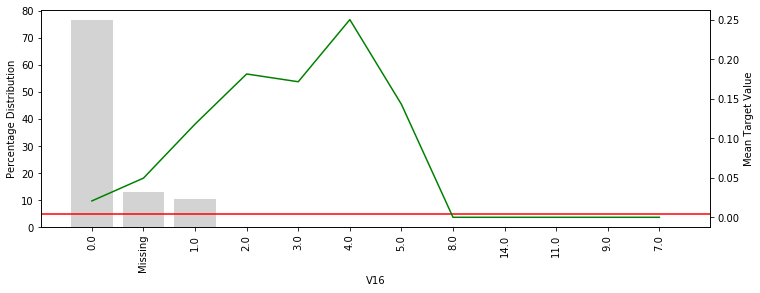

V16,0.0,Missing,1.0,2.0,3.0,4.0,5.0,8.0,14.0,11.0,9.0,7.0
count,153017.00000,25766.000000,20994.000000,160.00000,35.000000,12.000,7.000000,3.0000,2.000,2.000,1.0000,1.0000
perc,76.50850,12.883000,10.497000,0.08000,0.017500,0.006,0.003500,0.0015,0.001,0.001,0.0005,0.0005
isFraud,0.02071,0.049561,0.117891,0.18125,0.171429,0.250,0.142857,0.0000,0.000,0.000,0.0000,0.0000



5. Plot for V17


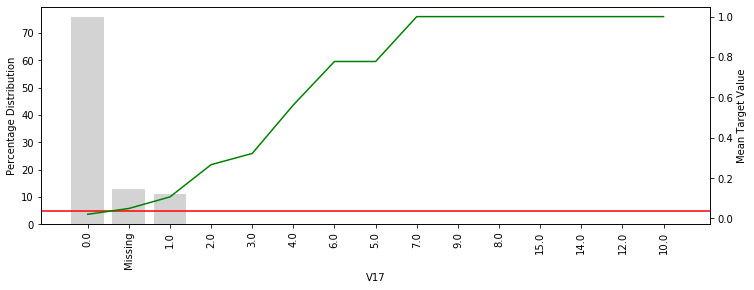

V17,0.0,Missing,1.0,2.0,3.0,4.0,6.0,5.0,7.0,9.0,8.0,15.0,14.0,12.0,10.0
count,151603.000000,25766.000000,22161.000000,315.000000,90.000000,32.0000,9.000000,9.000000,5.0000,3.0000,3.0000,1.0000,1.0000,1.0000,1.0000
perc,75.801500,12.883000,11.080500,0.157500,0.045000,0.0160,0.004500,0.004500,0.0025,0.0015,0.0015,0.0005,0.0005,0.0005,0.0005
isFraud,0.020798,0.049561,0.106945,0.266667,0.322222,0.5625,0.777778,0.777778,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000



6. Plot for V18


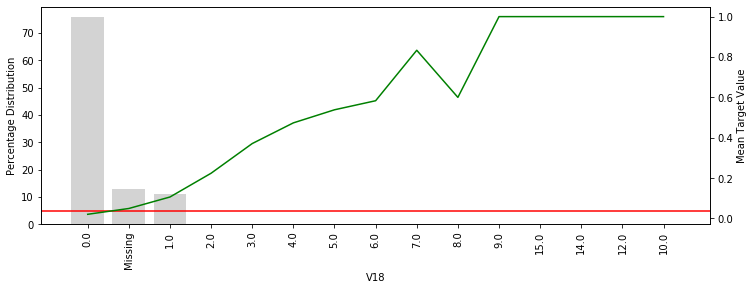

V18,0.0,Missing,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,15.0,14.0,12.0,10.0
count,151591.000000,25766.000000,22042.000000,388.000000,132.000000,38.000000,13.000000,12.000000,6.000000,5.0000,3.0000,1.0000,1.0000,1.0000,1.0000
perc,75.795500,12.883000,11.021000,0.194000,0.066000,0.019000,0.006500,0.006000,0.003000,0.0025,0.0015,0.0005,0.0005,0.0005,0.0005
isFraud,0.020799,0.049561,0.106479,0.224227,0.371212,0.473684,0.538462,0.583333,0.833333,0.6000,1.0000,1.0000,1.0000,1.0000,1.0000



7. Plot for V19


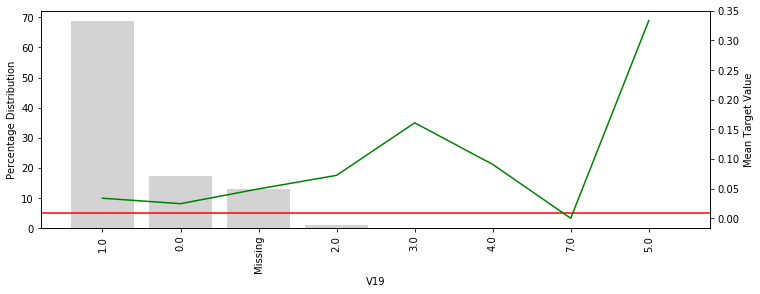

V19,1.0,0.0,Missing,2.0,3.0,4.0,7.0,5.0
count,137484.000000,34431.000000,25766.000000,2181.000000,118.000000,11.000000,6.000,3.000000
perc,68.742000,17.215500,12.883000,1.090500,0.059000,0.005500,0.003,0.001500
isFraud,0.033858,0.024658,0.049561,0.072444,0.161017,0.090909,0.000,0.333333



8. Plot for V20


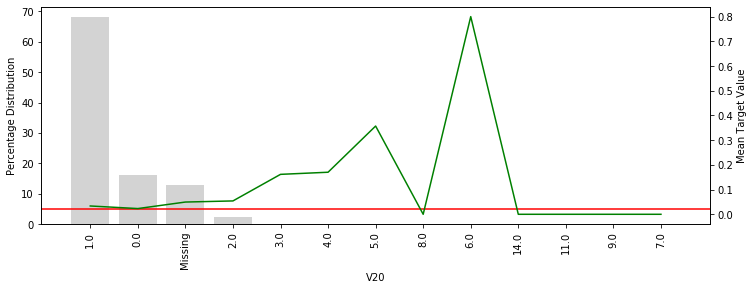

V20,1.0,0.0,Missing,2.0,3.0,4.0,5.0,8.0,6.0,14.0,11.0,9.0,7.0
count,136231.000000,32550.000000,25766.000000,5011.000000,365.000000,47.000000,14.000000,5.0000,5.0000,2.000,2.000,1.0000,1.0000
perc,68.115500,16.275000,12.883000,2.505500,0.182500,0.023500,0.007000,0.0025,0.0025,0.001,0.001,0.0005,0.0005
isFraud,0.033627,0.023195,0.049561,0.054081,0.161644,0.170213,0.357143,0.0000,0.8000,0.000,0.000,0.0000,0.0000



9. Plot for V21


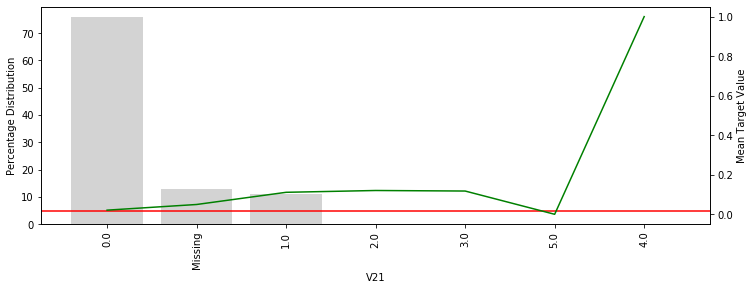

V21,0.0,Missing,1.0,2.0,3.0,5.0,4.0
count,151738.000000,25766.000000,22369.000000,108.00000,17.000000,1.0000,1.0000
perc,75.869000,12.883000,11.184500,0.05400,0.008500,0.0005,0.0005
isFraud,0.020951,0.049561,0.111225,0.12037,0.117647,0.0000,1.0000



10. Plot for V22


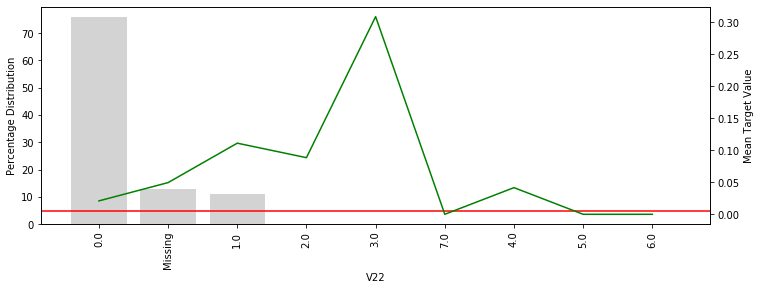

V22,0.0,Missing,1.0,2.0,3.0,7.0,4.0,5.0,6.0
count,151726.000000,25766.000000,22202.000000,192.000000,55.000000,30.000,24.000000,4.000,1.0000
perc,75.863000,12.883000,11.101000,0.096000,0.027500,0.015,0.012000,0.002,0.0005
isFraud,0.020952,0.049561,0.111206,0.088542,0.309091,0.000,0.041667,0.000,0.0000



11. Plot for V23


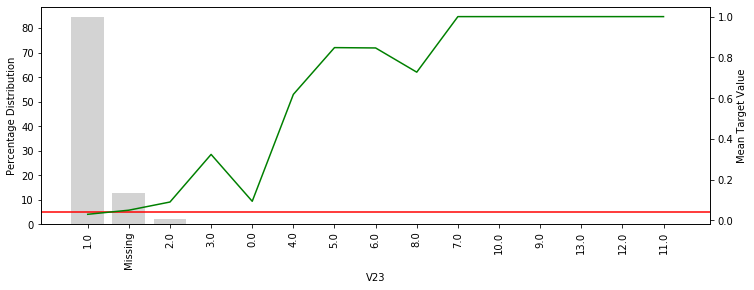

V23,1.0,Missing,2.0,3.0,0.0,4.0,5.0,6.0,8.0,7.0,10.0,9.0,13.0,12.0,11.0
count,168928.000000,25766.000000,4493.000000,405.000000,193.000000,110.000000,46.000000,26.000000,11.000000,10.000,5.0000,4.000,1.0000,1.0000,1.0000
perc,84.464000,12.883000,2.246500,0.202500,0.096500,0.055000,0.023000,0.013000,0.005500,0.005,0.0025,0.002,0.0005,0.0005,0.0005
isFraud,0.029433,0.049561,0.089695,0.323457,0.093264,0.618182,0.847826,0.846154,0.727273,1.000,1.0000,1.000,1.0000,1.0000,1.0000



12. Plot for V24


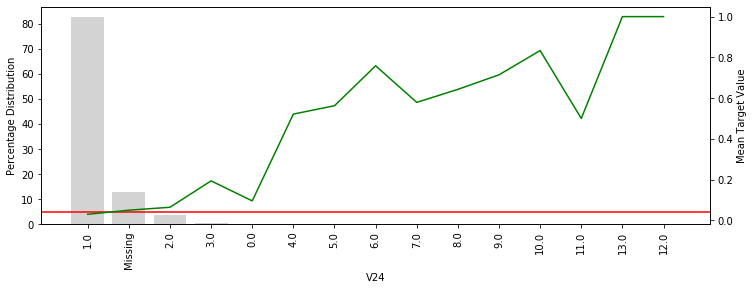

V24,1.0,Missing,2.0,3.0,0.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,13.0,12.0
count,165393.000000,25766.000000,7620.000000,749.000000,189.000000,140.000000,64.0000,29.000000,19.000000,14.000000,7.000000,6.000000,2.000,1.0000,1.0000
perc,82.696500,12.883000,3.810000,0.374500,0.094500,0.070000,0.0320,0.014500,0.009500,0.007000,0.003500,0.003000,0.001,0.0005,0.0005
isFraud,0.029439,0.049561,0.063911,0.193591,0.095238,0.521429,0.5625,0.758621,0.578947,0.642857,0.714286,0.833333,0.500,1.0000,1.0000



13. Plot for V25


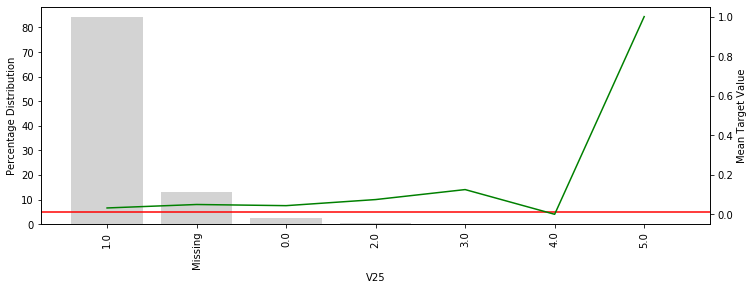

V25,1.0,Missing,0.0,2.0,3.0,4.0,5.0
count,168434.000000,25766.000000,4874.000000,859.000000,64.000,2.000,1.0000
perc,84.217000,12.883000,2.437000,0.429500,0.032,0.001,0.0005
isFraud,0.032042,0.049561,0.043701,0.074505,0.125,0.000,1.0000



14. Plot for V26


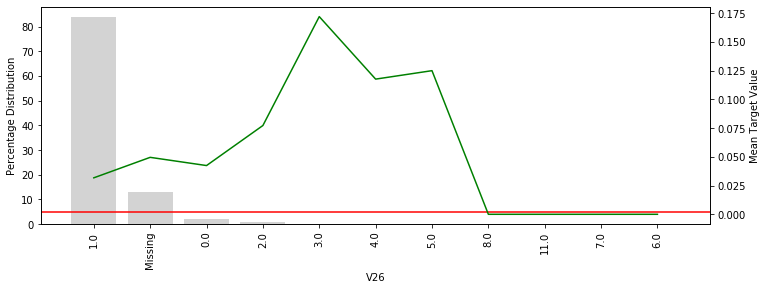

V26,1.0,Missing,0.0,2.0,3.0,4.0,5.0,8.0,11.0,7.0,6.0
count,167730.000000,25766.000000,4385.000000,1993.00000,93.000000,17.000000,8.000,5.0000,1.0000,1.0000,1.0000
perc,83.865000,12.883000,2.192500,0.99650,0.046500,0.008500,0.004,0.0025,0.0005,0.0005,0.0005
isFraud,0.031741,0.049561,0.042417,0.07727,0.172043,0.117647,0.125,0.0000,0.0000,0.0000,0.0000



15. Plot for V27


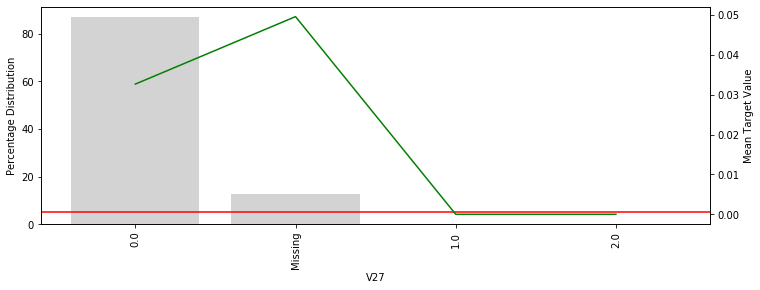

V27,0.0,Missing,1.0,2.0
count,174087.000000,25766.000000,146.000,1.0000
perc,87.043500,12.883000,0.073,0.0005
isFraud,0.032645,0.049561,0.000,0.0000



16. Plot for V28


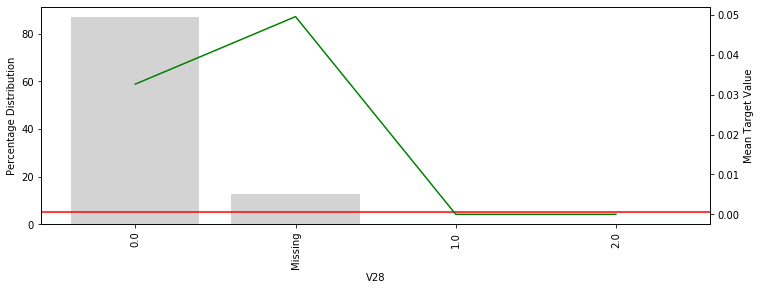

V28,0.0,Missing,1.0,2.0
count,174085.000000,25766.000000,138.000,11.0000
perc,87.042500,12.883000,0.069,0.0055
isFraud,0.032645,0.049561,0.000,0.0000



17. Plot for V29


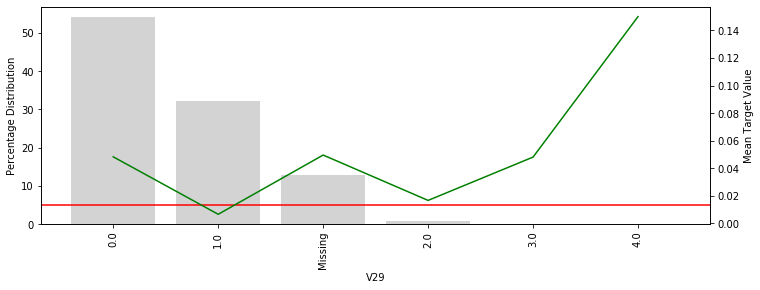

V29,0.0,1.0,Missing,2.0,3.0,4.0
count,108252.000000,64297.000000,25766.000000,1561.000000,104.000000,20.00
perc,54.126000,32.148500,12.883000,0.780500,0.052000,0.01
isFraud,0.048276,0.006579,0.049561,0.016656,0.048077,0.15



18. Plot for V30


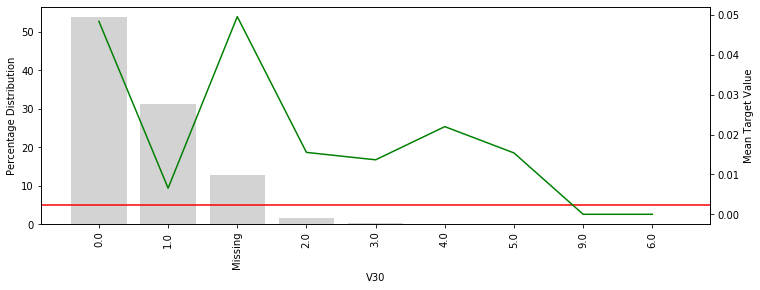

V30,0.0,1.0,Missing,2.0,3.0,4.0,5.0,9.0,6.0
count,107775.000000,62648.00000,25766.000000,3286.00000,366.000000,91.000000,65.000000,2.000,1.0000
perc,53.887500,31.32400,12.883000,1.64300,0.183000,0.045500,0.032500,0.001,0.0005
isFraud,0.048369,0.00656,0.049561,0.01552,0.013661,0.021978,0.015385,0.000,0.0000



19. Plot for V31


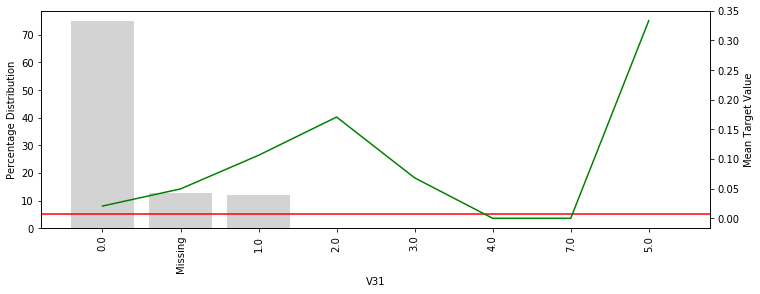

V31,0.0,Missing,1.0,2.0,3.0,4.0,7.0,5.0
count,149966.000000,25766.000000,24039.000000,164.000000,44.000000,12.000,6.000,3.000000
perc,74.983000,12.883000,12.019500,0.082000,0.022000,0.006,0.003,0.001500
isFraud,0.020651,0.049561,0.106244,0.170732,0.068182,0.000,0.000,0.333333



20. Plot for V32


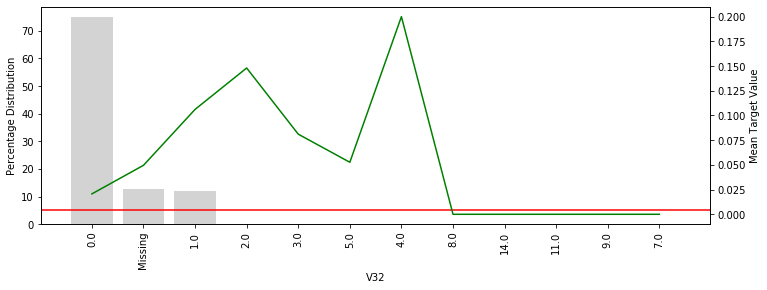

V32,0.0,Missing,1.0,2.0,3.0,5.0,4.0,8.0,14.0,11.0,9.0,7.0
count,149956.000000,25766.000000,23884.000000,277.000000,74.000000,19.000000,15.0000,3.0000,2.000,2.000,1.0000,1.0000
perc,74.978000,12.883000,11.942000,0.138500,0.037000,0.009500,0.0075,0.0015,0.001,0.001,0.0005,0.0005
isFraud,0.020653,0.049561,0.106138,0.148014,0.081081,0.052632,0.2000,0.0000,0.000,0.000,0.0000,0.0000



21. Plot for V33


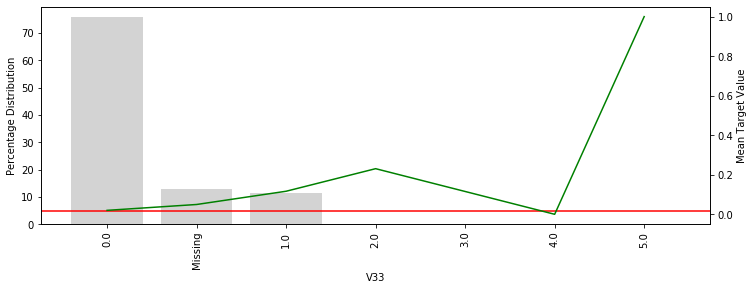

V33,0.0,Missing,1.0,2.0,3.0,4.0,5.0
count,151565.000000,25766.000000,22523.000000,117.000000,26.000000,2.000,1.0000
perc,75.782500,12.883000,11.261500,0.058500,0.013000,0.001,0.0005
isFraud,0.019965,0.049561,0.116592,0.230769,0.115385,0.000,1.0000



22. Plot for V34


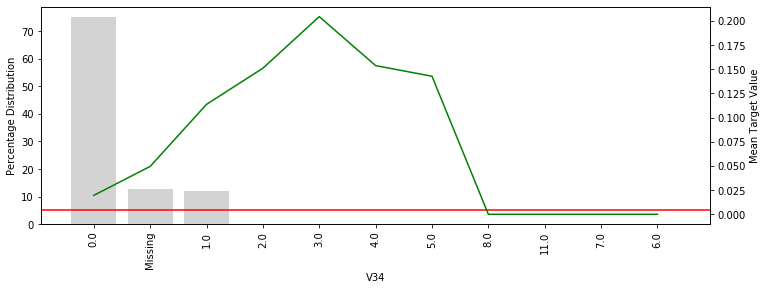

V34,0.0,Missing,1.0,2.0,3.0,4.0,5.0,8.0,11.0,7.0,6.0
count,150259.000000,25766.000000,23733.000000,172.000000,44.000000,13.000000,7.000000,3.0000,1.0000,1.0000,1.0000
perc,75.129500,12.883000,11.866500,0.086000,0.022000,0.006500,0.003500,0.0015,0.0005,0.0005,0.0005
isFraud,0.019599,0.049561,0.113766,0.151163,0.204545,0.153846,0.142857,0.0000,0.0000,0.0000,0.0000


In [22]:
check_vars3 = ['V'+str(i) for i in range(13,35)]
eda_categorical_plots_with_target(trans, check_vars3, target = 'isFraud', 
                                  add_missing=True, add_rare=False, rare_tol=5)

### Split Data - Train, Valid, Test

In [8]:
from sklearn.model_selection import train_test_split

# Create a train, validation and test set
train, valid = train_test_split(trans, test_size = .10)
train, test = train_test_split(train, test_size = .10)

print(f'train shape : {train.shape} \t valid shape : {valid.shape} \t test shape : {test.shape}')

train shape : (162000, 394) 	 valid shape : (20000, 394) 	 test shape : (18000, 394)
